******INX FUTURE INC EMPLOYEE PERFORMANCE PROJECT******

**Project Overview**


The INX Future Inc Employee Performance Analysis project aims to analyze employee performance data to identify key factors influencing performance and provide actionable insights to improve workforce productivity and satisfaction. The project involves exploring the dataset, performing statistical analysis, and building predictive models to understand and predict employee performance.


**Business Understanding**


INX Future Inc is a hypothetical organization that wants to optimize its workforce performance. The company faces challenges such as:

- High employee turnover.

- Variability in employee performance.

- Lack of clarity on factors influencing performance.

By analyzing employee performance data, the company aims to:

- Identify drivers of high and low performance.

- Predict employee performance to take proactive measures.

- Improve employee satisfaction and retention.

  

**Research Question**
The primary research question for this project is:

***"What are the key factors influencing employee performance at INX Future Inc, and how can we predict and improve it?"***


**Objectives**

**1. Main objectives**

- Identify Key Performance Drivers:

- Determine which factors (e.g., job role, department, satisfaction, training) significantly impact employee performance.

- Predict Employee Performance:

- Build predictive models to classify or predict employee performance ratings.

- Provide Actionable Insights:

- Recommend strategies to improve employee performance and satisfaction.

**2. Sub-Objectives**

To achieve the main objectives, the following sub-objectives are defined:

**(i) Data Exploration:**

Perform exploratory data analysis (EDA) to understand the dataset's structure, distribution, and relationships.

**(ii) Feature Engineering:**

Create new features or transform existing ones to improve model performance.

**(iii) Model Development:**

Build and evaluate machine learning models to predict employee performance.

**(iv) Visualization:**

Create visualizations to communicate insights effectively.

**(v) Recommendations:**

Provide data-driven recommendations to improve employee performance.

**Data Understanding**

The dataset provided in the link (http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls) contains employee-related attributes such as Age, Gender, Education Level, Marital Status, Department, Job Role, Job Level, Years at Company, Years in Current Role,
Performance Rating (Target Variable), Satisfaction Score, Number of Projects, Average Monthly Hours, Training Hours, Salary Level, Promotion History
and Work-Life Balance Score.

In [6]:
# install the openpyxl Python library, which is used to read, write and manipulate Excel files 
!pip install openpyxl


In [7]:
# verify that openpyxl is installed
# print the version of openpyxl.
import openpyxl
print(openpyxl.__version__)

3.1.5


In [8]:
import pandas as pd
import requests
from io import BytesIO

# URL to the dataset
url = "http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls"

# Download the file
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Load the data into a DataFrame
    df = pd.read_excel(BytesIO(response.content))
    
    # Display the first 5 rows
    print(df.head())
else:
    print("Failed to download the file. Status code:", response.status_code)

  EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...     

In [9]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [10]:
# Display the last five rows

print(df.tail())

     EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                           

In [11]:
# to know about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [12]:
#Check the Shape of the Dataset
#To see the number of rows and columns in the dataset:

print("Shape of the dataset:", df.shape)

Shape of the dataset: (1200, 28)


In [13]:
# Check Column Names
# To see the names of all columns in the dataset:

print("Column names:", df.columns)

Column names: Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')


**Describing the meaning of each feature**

- **EmpNumber** shows uniqe ID number of each Employee and it is not required for modeling and analysing.

- **Age** shows how much the employee is older.

- **Gender** is the sex of employee (Male , Female , Transgender).

- **EducationBackground** is the specialization of employees in which they studied.

- **MaritalStatus** shows that the employee is married or not (Married, Unmarried , Single).

- **EmpDepartment** is the department of employee in which they working.

- **EmpJobRole** shows the position of employee.

- **BusinessTravelFrequency** means how many times the employee travels for the field or near to clients.

- **DistanceFromHome** is how far the employee stays from the company.

- **EmpEducationLevel** is the highest qualification of employee.

- **EmpEnvironmentSatisfaction** is a rating about the work calture or Environment in which they works.

- **EmpHourlyRate** shows how much time employee works in a day.

- **EmpJobInvolvement** is the employee's emotional investment in their work.

- **EmpJobLevel** is the employee's position within the organization.

- **EmpJobSatisfaction** is level of job satisfaction that employees experience in their current roles.

- **NumCompaniesWorked** shows that how many companies the employee worked before.

- **OverTime** indicating whether an employee works beyond their regular hours.

- **EmpLastSalaryHikePercent** percentage increase in an employee's salary during their most recent salary hike.

- **EmpRelationshipSatisfaction** shows that the relationships with colleagues, supervisors, and team members.

- **TotalWorkExperienceInYears** is the number of years of work experience that an employee has accumulated throughout their career.

- **TrainingTimesLastYear** is the number of times an employee received training in the last year.

- **EmpWorkLifeBalance** shows that how well an employee can manage their professional and personal commitments.

- **ExperienceYearsAtThisCompany** indicates the number of years an employee has worked at their current company.

- **ExperienceYearsInCurrentRole** represent the number of years an employee has spent in their current job role or position within the organization.

- **YearsSinceLastPromotion** indicates the number of years that have elapsed since an employee's last promotion within the organization.

- **YearsWithCurrManager** shows that the number of years an employee has worked under their current manager.

- **Attrition** used to determine whether an employee has left the organization or is still employed

- **PerformanceRating** represent an employee's performance rating within the organization and it is our Target Class.based on it we predict about employee.

In [15]:
# Check Data Types
# To see the data types of each column:

print("Data types:\n", df.dtypes)

Data types:
 EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCur

In [16]:
# Check for Missing Values
# To check if there are any missing values in the dataset:

print("Missing values:\n", df.isnull().sum())

Missing values:
 EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


In [17]:
# View Statistics
# To get statistics (e.g., mean, min, max) for numerical columns:

print("Statistics:\n", df.describe())

Statistics:
                Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.00

**Key Statistics Explained**

**count:** The number of non-null (non-missing) entries for each column. Here, all columns have 1200 entries, indicating no missing values.

**mean:** The average value of each column.

**std:** The standard deviation, which measures the spread or dispersion of the data. A higher std indicates more variability.

**min:** The minimum value in the column.

**25% (Q1):** The 25th percentile (first quartile), meaning 25% of the data falls below this value.

**50% (Q2):** The 50th percentile (median), meaning 50% of the data falls below this value.

**75% (Q3):** The 75th percentile (third quartile), meaning 75% of the data falls below this value.

**max:** The maximum value in the column.



**Column-Specific Insights**

**1. Age**
- Mean: 36.92 years

- Range: Employees are between 18 and 60 years old.

- Insight: The workforce is relatively young, with most employees in their 30s (median = 36).

**2. DistanceFromHome**
- Mean: 9.17 units (likely miles or kilometers)

- Range: Employees live between 1 and 29 units away from work.

- Insight: Most employees live relatively close to work (median = 7).

**3. EmpEducationLevel**
- Mean: 2.89 (on a scale of 1 to 5)

- Range: Education levels range from 1 (lowest) to 5 (highest).

- Insight: Most employees have a mid-level education (median = 3).

**4. EmpEnvironmentSatisfaction**
- Mean: 2.72 (on a scale of 1 to 4)

- Range: Satisfaction levels range from 1 (lowest) to 4 (highest).

- Insight: Employees are moderately satisfied with their work environment.

**5. EmpHourlyRate**
- Mean: $65.98 per hour

- Range: Hourly rates range from 30 to 100.

- Insight: There is a wide variation in hourly rates, with most employees earning around $66 (median).

**6. EmpJobInvolvement**
- Mean: 2.73 (on a scale of 1 to 4)

- Range: Job involvement levels range from 1 (lowest) to 4 (highest).

- Insight: Employees are moderately involved in their jobs.

**7. EmpJobLevel**
- Mean: 2.07 (on a scale of 1 to 5)

- Range: Job levels range from 1 (lowest) to 5 (highest).

- Insight: Most employees are at lower job levels (median = 2).

**8. EmpJobSatisfaction**
- Mean: 2.73 (on a scale of 1 to 4)

- Range: Job satisfaction levels range from 1 (lowest) to 4 (highest).

- Insight: Employees are moderately satisfied with their jobs.

**9. NumCompaniesWorked**
- Mean: 2.67 companies

- Range: Employees have worked at 0 to 9 companies.

- Insight: Most employees have worked at 2-4 companies (median = 2).

**10. EmpLastSalaryHikePercent**
- Mean: 15.22%

- Range: Salary hikes range from 11% to 25%.

- Insight: Most employees received a 14% salary hike (median).

**11. EmpRelationshipSatisfaction**
- Mean: 2.73 (on a scale of 1 to 4)

- Range: Relationship satisfaction levels range from 1 (lowest) to 4 (highest).

- Insight: Employees are moderately satisfied with their workplace relationships.

**12. TotalWorkExperienceInYears**
- Mean: 11.33 years

- Range: Work experience ranges from 0 to 40 years.

- Insight: The workforce has a mix of fresh and experienced employees (median = 10 years).

**13. TrainingTimesLastYear**
- Mean: 2.79 training sessions

- Range: Employees attended 0 to 6 training sessions.

- Insight: Most employees attended 2-3 training sessions last year (median = 3).

**14. EmpWorkLifeBalance**
- Mean: 2.74 (on a scale of 1 to 4)

- Range: Work-life balance ratings range from 1 (lowest) to 4 (highest).

- Insight: Employees feel moderately balanced between work and personal life.

**15. ExperienceYearsAtThisCompany**
_ Mean: 7.08 years

_ Range: Employees have been with the company for 0 to 40 years.

_ Insight: Most employees have been with the company for 5-10 years (median = 5).

**16. ExperienceYearsInCurrentRole**
- Mean: 4.29 years

- Range: Employees have been in their current role for 0 to 18 years.

- Insight: Most employees have been in their current role for 2-7 years (median = 3).

**17. YearsSinceLastPromotion**
- Mean: 2.19 years

- Range: Employees have gone 0 to 15 years without a promotion.

- Insight: Most employees were promoted within the last 1-3 years (median = 1).

**18. YearsWithCurrManager**
- Mean: 4.11 years

- Range: Employees have worked with their current manager for 0 to 17 years.

- Insight: Most employees have worked with their current manager for 2-7 years (median = 3).

**19. PerformanceRating**
- Mean: 2.95 (on a scale of 2 to 4)

- Range: Performance ratings range from 2 (lowest) to 4 (highest).

- Insight: Most employees have a performance rating of 3 (median = 3).

In [19]:
# To see the Distribution of Categorical features

print("Categorial features:\n", df.describe(include=['O']))

Categorial features:
        EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022  


**Key Statistics Explained**

**count:** The number of non-null (non-missing) entries for each column. Here, all columns have 1200 entries, indicating no missing values.

**unique:** The number of distinct categories in each column.

**top:** The most frequently occurring category (mode) in each column.

**freq:** The frequency of the most common category (top).

**Column-Specific Insights**

**1. EmpNumber**
- Unique: 1200

- Top: E1001000 (appears once)

- Insight: Each employee has a unique identifier (EmpNumber), which is expected for an employee dataset.

**2. Gender**
- Unique: 2 (Male, Female)

- Top: Male (frequency = 725)

- Insight: The workforce is predominantly male (60.4% male, 39.6% female).

**3. EducationBackground**
- Unique: 6

- Top: Life Sciences (frequency = 492)

- Insight: Most employees have a background in Life Sciences (41%), followed by other fields like Medical, Marketing, etc.

**4. MaritalStatus**
- Unique: 3 (Married, Single, Divorced)

- Top: Married (frequency = 548)

- Insight: Most employees are Married (45.7%), followed by Single and Divorced.

**5. EmpDepartment**
- Unique: 6

- Top: Sales (frequency = 373)

- Insight: The Sales department has the most employees (31.1%), followed by other departments like Research & Development, Human Resources, etc.

**6. EmpJobRole**
- Unique: 19

- Top: Sales Executive (frequency = 270)

- Insight: The most common job role is Sales Executive (22.5%), followed by other roles like Research Scientist, Laboratory Technician, etc.

**7. BusinessTravelFrequency**
- Unique: 3 (Travel_Rarely, Travel_Frequently, Non-Travel)

- Top: Travel_Rarely (frequency = 846)

- Insight: Most employees rarely travel for business (70.5%), while a smaller percentage travel frequently or do not travel at all.

**8. OverTime**
- Unique: 2 (Yes, No)

- Top: No (frequency = 847)

- Insight: Most employees do not work overtime (70.6%), while 29.4% do.

**9. Attrition**
- Unique: 2 (Yes, No)

- Top: No (frequency = 1022)

- Insight: Most employees have not left the company (85.2%), while 14.8% have left (attrition rate).

In [21]:
# so here we drop the EmpNumber , because it's a unique serial number.
df.drop('EmpNumber',axis=1,inplace=True)

**Data Processing**


It involves collecting, organizing, cleaning and transforming raw data into a meaningful and usable format for analysis or decision-making. 

**1. Change categorial data to numerical data**

This process is essential because most machine learning algorithms and statistical models require numerical input. This conversion enables the algorithms to process and analyze the data effectively.

In [23]:
# lets see which categories need change

df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


From the above data, the categories that need conversion include Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole,	BusinessTravelFrequency, OverTime, Attrition and PerformanceRating. 

**(i)  Gender Counts**

In [26]:
# Group by 'Gender' and count the size of each group
gender_counts = df.groupby('Gender').size()
print(gender_counts)

Gender
Female    475
Male      725
dtype: int64


In [27]:
# Replace 'Female' with 0 and 'Male' with 1
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})

C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\4230827916.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


**(ii)  EducationBackground Counts**

In [29]:
# Group by 'EducationBackground' and count the size of each group
EducationBackground_counts = df.groupby('EducationBackground').size()
print(EducationBackground_counts)

EducationBackground
Human Resources      21
Life Sciences       492
Marketing           137
Medical             384
Other                66
Technical Degree    100
dtype: int64


In [30]:
# Replace categorical values with numerical values using replace
df['EducationBackground'] = df['EducationBackground'].replace({
    "Human Resources": 0,
    "Life Sciences": 1,
    "Marketing": 2,
    "Medical": 3,
    "Other": 4,
    "Technical Degree": 5
})

C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\555719630.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EducationBackground'] = df['EducationBackground'].replace({


**(iii) MaritalStatus Counts**

In [32]:
# Group by 'MaritalStatus' and count the size of each group
MaritalStatus_counts = df.groupby('MaritalStatus').size()
print(MaritalStatus_counts)

MaritalStatus
Divorced    268
Married     548
Single      384
dtype: int64


In [33]:
# Replace 'Divorced' with 0, 'Married' with 1 and Single with 2
df['MaritalStatus'] = df['MaritalStatus'].replace({'Divorced': 0, 'Married': 1, 'Single':2})

C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\4265937168.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MaritalStatus'] = df['MaritalStatus'].replace({'Divorced': 0, 'Married': 1, 'Single':2})


**(iv) EmpDepartment Counts**

In [35]:
# Group by 'EmpDepartment' and count the size of each group
EmpDepartment_counts = df.groupby('EmpDepartment').size()
print(EmpDepartment_counts)

EmpDepartment
Data Science               20
Development               361
Finance                    49
Human Resources            54
Research & Development    343
Sales                     373
dtype: int64


In [36]:
# Replace categorical values with numerical values using replace
df['EmpDepartment'] = df['EmpDepartment'].replace({
    "Data Science": 0,
    "Development": 1,
    "Finance": 2,
    "Human Resources": 3,
    "Research & Development": 4,
    "Sales": 5
})

C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\4232147890.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EmpDepartment'] = df['EmpDepartment'].replace({


**(v) EmpJobRole Counts**

In [38]:
# Group by 'EmpJobRole' and count the size of each group
EmpJobRole_counts = df.groupby('EmpJobRole').size()
print(EmpJobRole_counts)

EmpJobRole
Business Analyst              16
Data Scientist                20
Delivery Manager              12
Developer                    236
Finance Manager               49
Healthcare Representative     33
Human Resources               45
Laboratory Technician         64
Manager                       51
Manager R&D                   94
Manufacturing Director        33
Research Director             19
Research Scientist            77
Sales Executive              270
Sales Representative          69
Senior Developer              52
Senior Manager R&D            15
Technical Architect            7
Technical Lead                38
dtype: int64


In [39]:
# Use pandas.factorize to encode the column
df['EmpJobRole'] = pd.factorize(df['EmpJobRole'])[0]

**(vi) BusinessTravelFrequency Counts**

In [41]:
# Group by 'BusinessTravelFrequency' and count the size of each group
BusinessTravelFrequency_counts = df.groupby('BusinessTravelFrequency').size()
print(BusinessTravelFrequency_counts)

BusinessTravelFrequency
Non-Travel           132
Travel_Frequently    222
Travel_Rarely        846
dtype: int64


In [42]:
# Replace 'Non-Travel' with 0, 'Travel_Frequently ' with 1 and 'Travel_Rarely ' with 2
df['BusinessTravelFrequency'] = df['BusinessTravelFrequency'].replace({'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely':2})

C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\471338612.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BusinessTravelFrequency'] = df['BusinessTravelFrequency'].replace({'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely':2})


**(vii) OverTime Counts**

In [44]:
# Group by 'OverTime' and count the size of each group
OverTime_counts = df.groupby('OverTime').size()
print(OverTime_counts)

OverTime
No     847
Yes    353
dtype: int64


In [45]:
# Replace 'No' with 0 and 'Yes' with 1
df['OverTime'] = df['OverTime'].replace({'No': 0, 'Yes': 1})

C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\499890001.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['OverTime'] = df['OverTime'].replace({'No': 0, 'Yes': 1})


**(viii) Attrition Counts**

In [47]:
# Group by 'Attrition' and count the size of each group
Attrition_counts = df.groupby('Attrition').size()
print(Attrition_counts)

Attrition
No     1022
Yes     178
dtype: int64


In [48]:
# Replace 'No' with 0 and 'Yes' with 1
df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})

C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\2344338513.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Attrition'] = df['Attrition'].replace({'No': 0, 'Yes': 1})


**(ix) PerformanceRating Counts**

In [50]:
# Group by 'PerformanceRating' and count the size of each group
PerformanceRating_counts = df.groupby('PerformanceRating').size()
print(PerformanceRating_counts)

PerformanceRating
2    194
3    874
4    132
dtype: int64


In [51]:
# This is  a multiclass classification , so for better accuracy we convert output into 0 , 1 & 2
# Use map function to replace values
df['PerformanceRating'] = df['PerformanceRating'].map({2: 0, 3: 1, 4: 2})

In [52]:
# check and confirm the changed data
df.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,0,2,10,3,4,...,4,10,2,2,10,7,0,8,0,1
1,47,1,2,2,5,0,2,14,4,4,...,4,20,2,3,7,7,1,7,0,1
2,40,1,1,1,5,0,1,5,4,4,...,3,20,2,3,18,13,1,12,0,2
3,41,1,0,0,3,1,2,10,4,2,...,2,23,2,2,21,6,12,6,0,1
4,60,1,2,2,5,0,2,16,4,1,...,4,10,1,3,2,2,2,2,0,1


**Exploratory Data Analysis**

In [54]:
# separate Contineous data and categorical data
numerical_data = df[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent',
               'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                    'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

categorial_data = df.drop(numerical_data,axis=1)

**1. One-Dimensional Analysis**

This term focuses on one variable at a time, examining its distribution, central tendency and spread without considering relationships with other variables.

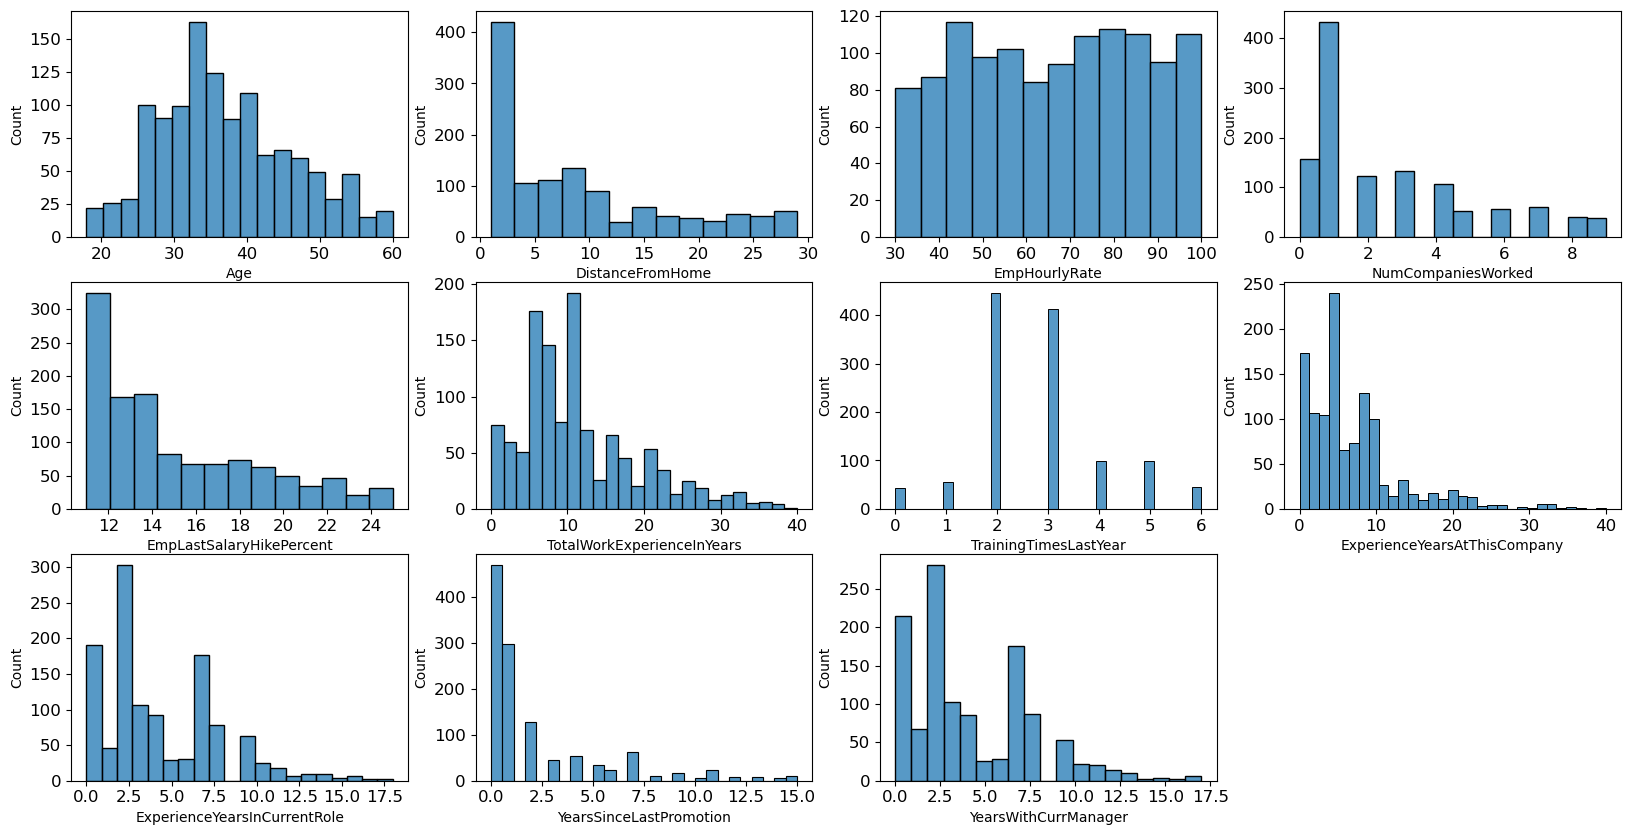

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set canvas size
plt.figure(figsize=(20, 10))

# Initialize plot counter
plot_number = 1

# Loop through numerical columns
for column in numerical_data.columns:
    # Create subplot in a 3x4 grid
    plt.subplot(3, 4, plot_number)
    
    # Plot histogram for the current column
    sns.histplot(x=df[column])
    
    # Customize tick labels
    plt.xticks(fontsize=12)  # Set X-axis tick label size
    plt.yticks(fontsize=12)  # Set Y-axis tick label size
    
    # Increment plot counter
    plot_number += 1

# Display the plots
plt.show()


**Employee Demographics and Work Patterns at INX**

- Age Distribution:

The majority of employees at INX are between 25 to 40 years old, indicating a relatively young workforce.

- Commute Distance:

Approximately 35% of employees live within a 3 km radius of the office, making their commute relatively short.

About 30% of employees reside more than 10 km away, suggesting a significant portion has a longer commute.

- Hourly Rates:

All employees charge an hourly rate between 80 and 120, indicating a standardized pay structure for their roles.

- Work Experience:

13% of employees are freshers with no prior work experience.

An additional 36% of employees have worked for only one company, making them relatively new to the job market.

35% of employees have up to 5 years of experience, while 40% have 10 to 15 years of experience.

Only 10% of employees have over 20 years of experience, showcasing their loyalty and dedication to the company.

- Salary Hike:

61% of employees received a salary hike of 11% to 15% from their last salary, indicating moderate increments.

- Training:

70% of employees underwent training 2 or 3 times in the last year, reflecting a focus on skill development.

- Experience in Current Role:

60% of employees have up to 5 years of experience in their current roles, suggesting frequent role changes or promotions.

- Promotions:

Only 5% of employees have not been promoted for over 10 years.

80% of employees were promoted within 2 years, highlighting a culture of recognizing and rewarding performance.

- Manager Tenure:

40% of employees have been working under their current manager for the last 2 years, indicating stable team structures.

**Key Insights:**
                                                              
- The workforce is predominantly young, with a mix of freshers and experienced professionals.

- A significant portion of employees live close to the office, but a notable percentage has a longer commute.

- Salary hikes and training programs are consistent, reflecting a focus on employee growth and development.

- Promotions are frequent, with most employees being promoted within 2 years, indicating a performance-driven culture.

- A small but loyal group of employees with over 20 years of experience demonstrates long-term commitment to the company.

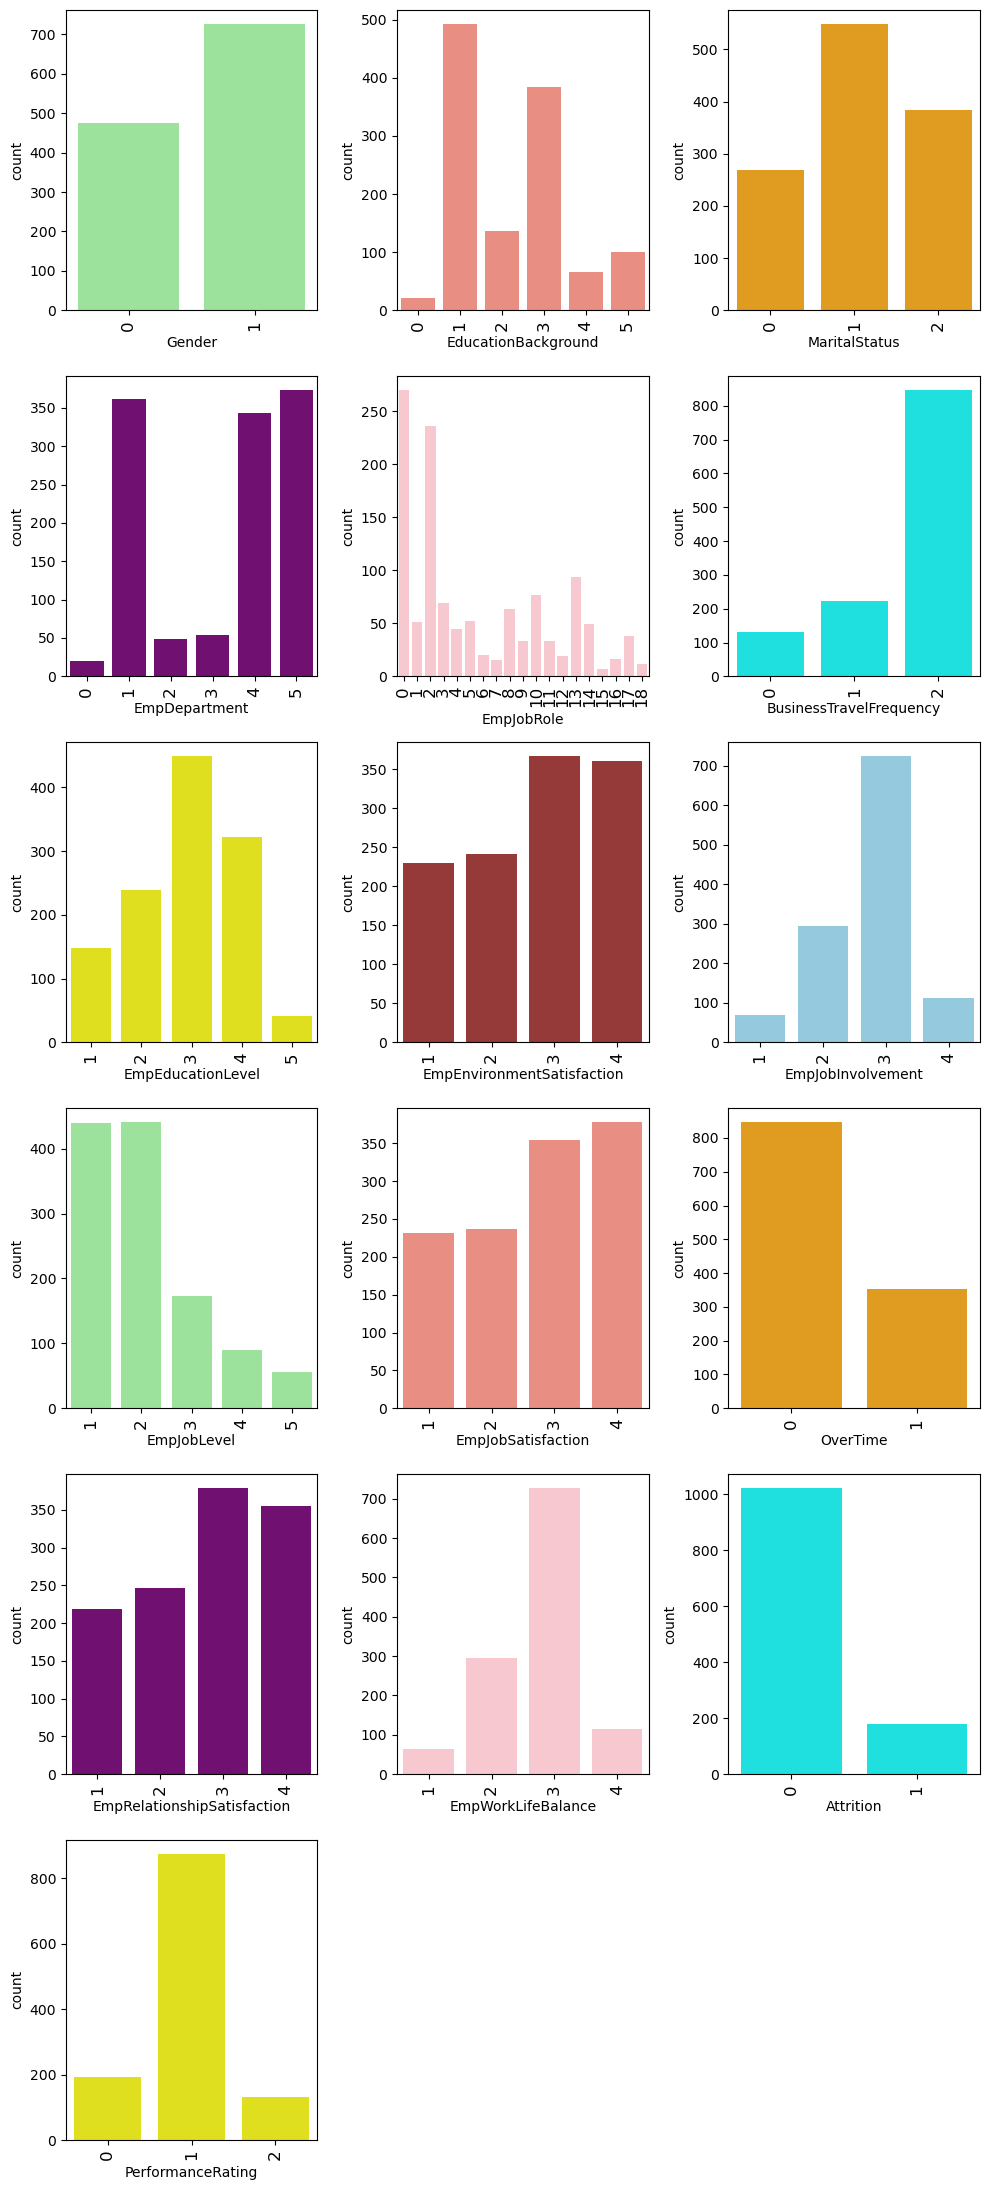

In [58]:

#  One-Dimensional Analysis for Categorical Data
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 'pink', 'cyan', 'yellow', 'brown']

plt.figure(figsize=(10, 22))                                          # Set canvas size
plotnumber = 1
for i in categorial_data.columns:                                            # iterate over categorical data
    plt.subplot(6, 3, plotnumber)                                     # set plots in a row & column
    sns.countplot(x=df[i], color=colors[plotnumber % len(colors)])  # plot count plot with custom colors
    plt.xticks(rotation=90, fontsize=12)                              # set x_ticks size with rotation
    plotnumber += 1
plt.tight_layout()                                                    # avoid overlapping
plt.show()

**Employee Demographics and Work Patterns at INX**

- Gender Distribution:

60% of employees are male, while 40% are female, indicating a slightly male-dominated workforce.

- Educational Background:

41% of employees have a Life Sciences background, making it the most common field of study.

32% of employees come from a Medical background, followed by other fields.

- Marital Status:

46% of employees are married, while 32% are single and 22% are divorced.

- Department Distribution:

The majority of employees work in Sales (31%), followed by Development (30%) and Research (29%).

- Job Roles:

22% of employees work as Sales Executives, while 20% are in Development roles.

- Business Travel:

70% of employees rarely travel for work, while 18% travel frequently and 12% do not travel at all.

- Education Level:

37% of employees have Level 3 education, and 27% have Level 4 education.

- Environment Satisfaction:

Over 60% of employees have a good environment satisfaction rating of 3 or 4 out of 5.

- Job Involvement:

60% of employees are moderately involved in their jobs, while only 9% are highly involved.

- Job Level:

Approximately 75% of employees are at Job Level 1 or 2.

- Job Satisfaction:

40% of employees are not satisfied with their jobs, while 60% are satisfied.

- Overtime Preference:

Only 30% of employees prefer overtime, while the remaining 70% do not.

- Relationship Satisfaction:

40% of employees are not satisfied with their relationships with colleagues or seniors.

- Work-Life Balance:

Only 10% of employees manage their work-life balance well, while 30% do not and 60% have a moderate balance.

- Attrition:

85% of employees are not considering leaving their jobs, while 15% are at risk of attrition.

  Performance:

Only 11% of employees perform exceptionally well, while 73% have moderate performance and 16% are underperforming.

**Key Insights:**

- The workforce is slightly male-dominated, with a significant portion having a Life Sciences or Medical background.

- A majority of employees are married and work in Sales, Development, or Research roles.

- Most employees rarely travel for work and have moderate job involvement and satisfaction.

- Work-life balance and relationship satisfaction are areas needing improvement, as a significant portion of employees struggle with these aspects.

- While most employees are not at risk of attrition, there is a notable percentage of underperformers and those dissatisfied with their jobs.

**2. Correlational Analysis**

This term focuses on examining the relationship between two variables at a time. 


C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\1575445578.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['PerformanceRating'], y=df[i], palette=["red", "yellow", "green"])
C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\1575445578.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['PerformanceRating'], y=df[i], palette=["red", "yellow", "green"])
C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\1575445578.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['PerformanceRating'], y=df[i], palette=["red", "yello

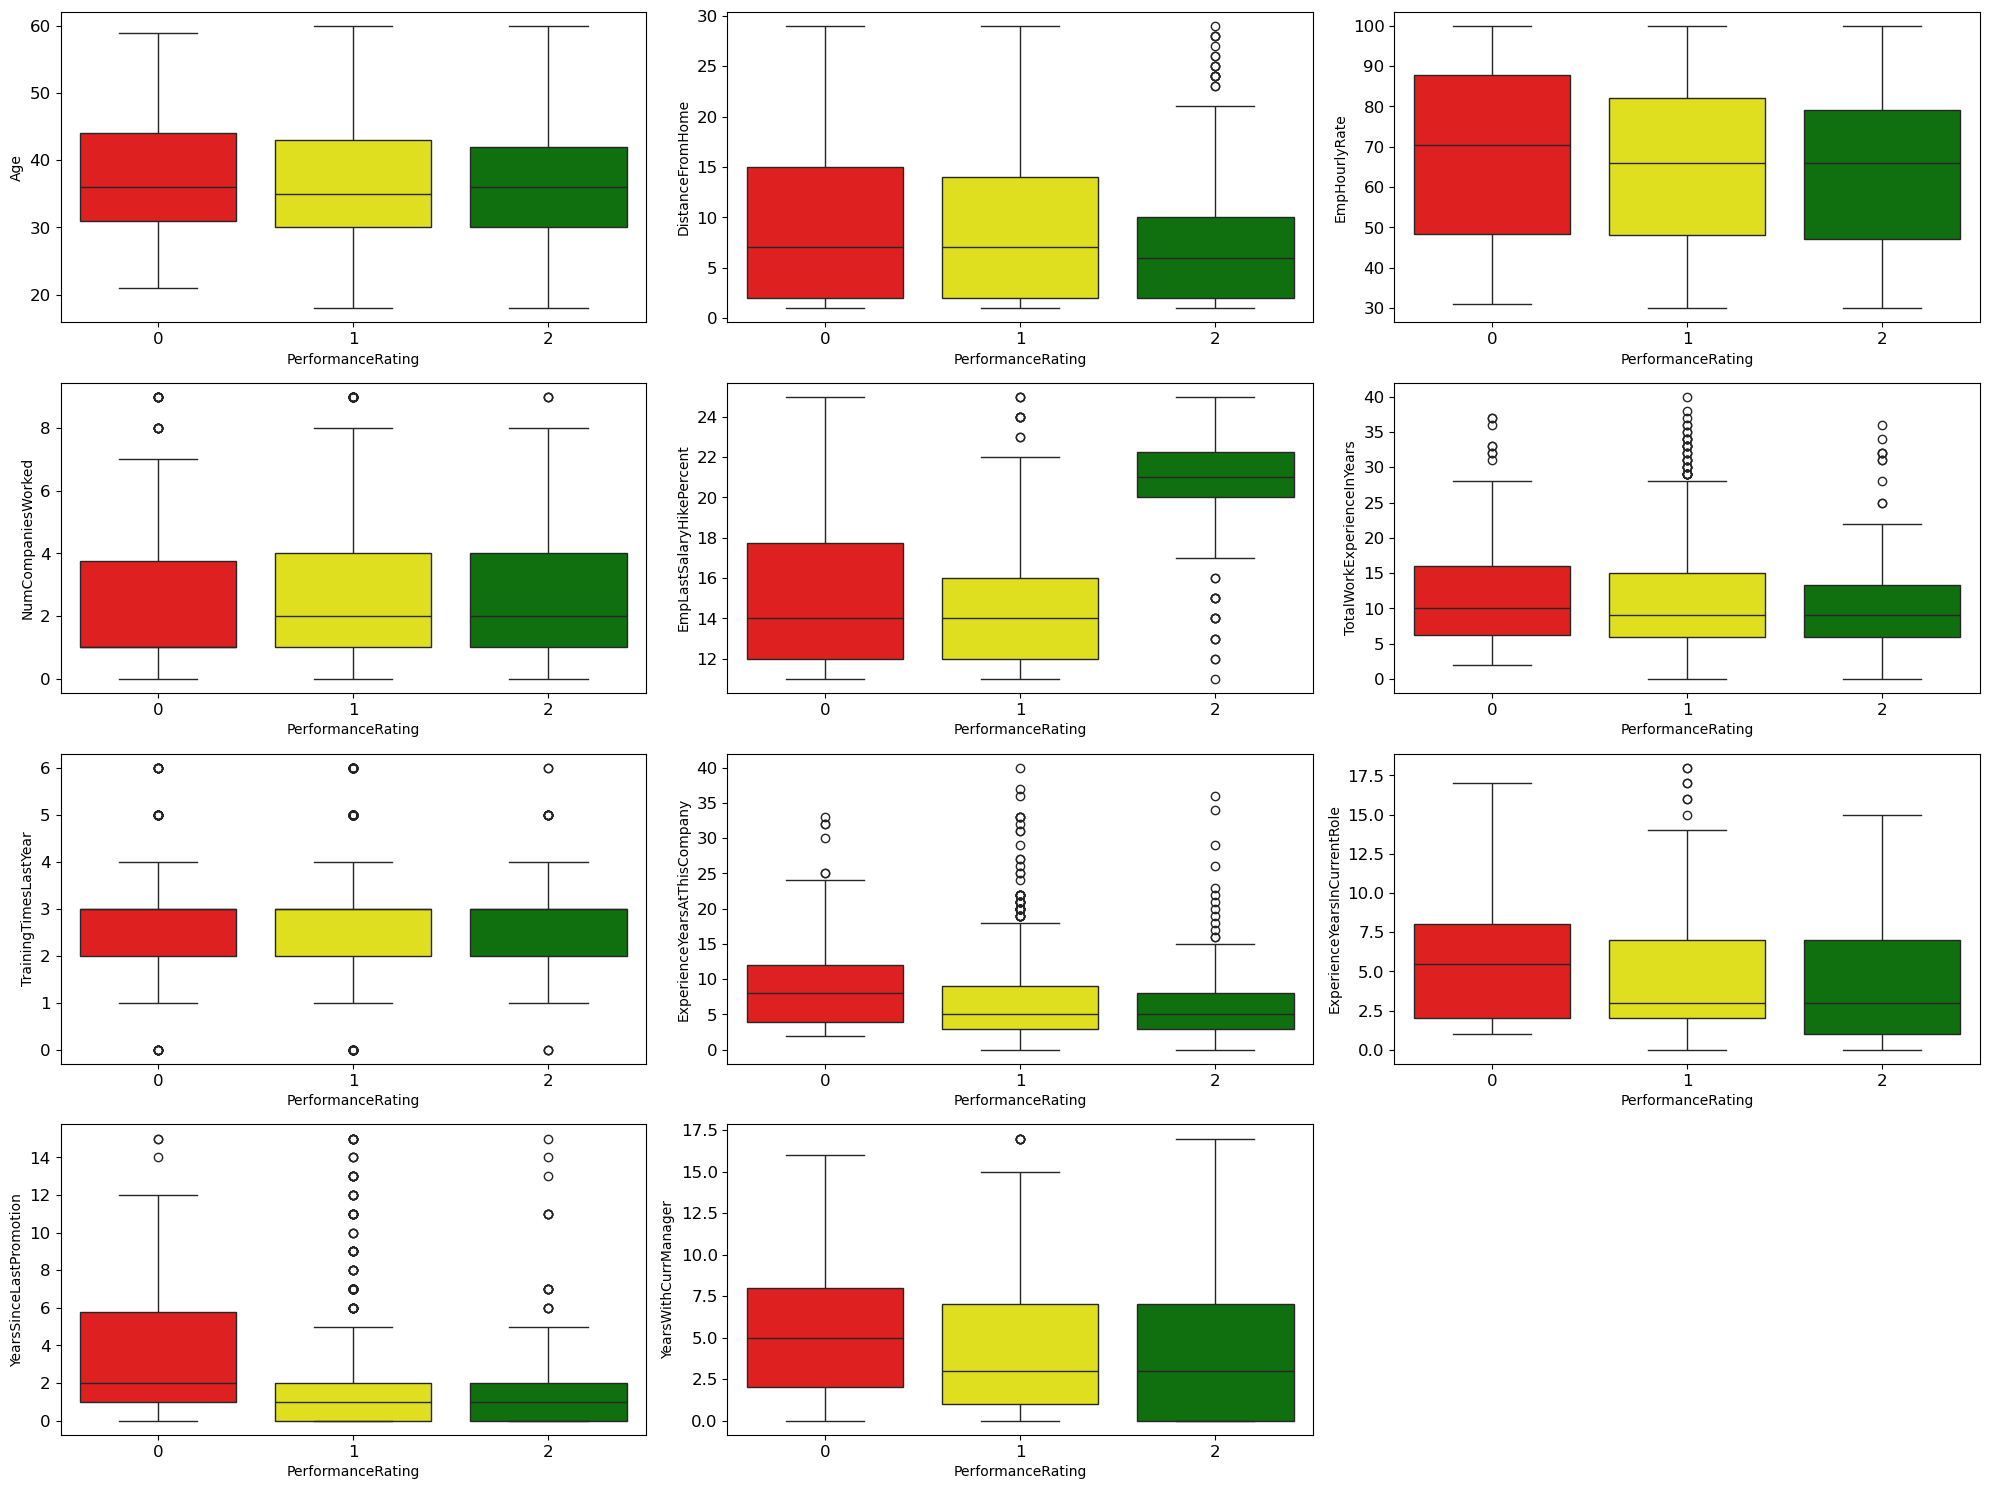

In [61]:
# Correlational Analysis for Numerical Data
plt.figure(figsize=(20, 15))         # Set canvas size
plotnumber = 1                       # Initialize plot counter

# Iterate through numerical columns
for i in numerical_data.columns:
    plt.subplot(4, 3, plotnumber)    # Set subplot grid (4 rows, 3 columns)
    
    # Create a boxplot with hue for PerformanceRating
    sns.boxplot(x=df['PerformanceRating'], y=df[i], palette=["red", "yellow", "green"])
    
    # Customize tick labels
    plt.xticks(fontsize=12)          # Set x-tick size
    plt.yticks(fontsize=12)          # Set y-tick size
    
    plotnumber += 1                  # Increment plot counter

plt.tight_layout()                   # Avoid overlapping
plt.show()

**Employee Performance Insights**

- Age Group:

Employees aged between 25 and 45 tend to have poor performance.

- Commute Distance:

Employees who live less than 10 km from the office show lower performance.

- Hourly Rate:

Employees with an hourly rate above 85 exhibit poor performance.

- Work Experience:

Employees who have worked for only one company tend to have lower performance.

Employees with 5 to 15 years of experience also show poor performance.

- Salary Hike:

Employees with a salary hike below 14% have very low performance.

Conversely, employees with a salary hike greater than 20% demonstrate excellent performance.

- Training:

Employees who underwent training 2 or 3 times in the last year tend to have poor performance.

- Tenure at Company:

Freshers and employees who have worked for 10 years in the company show lower performance.

- Experience in Current Role:

Employees who have been in the same role for 2 years exhibit poor performance.

- Promotions:

Employees who were promoted within 4 years tend to have lower performance.

- Manager Tenure:

Employees who have worked under the same manager for 2 years or more than 6.5 years show poor performance.

**Key Insights:**
- Age, commute distance, and hourly rate are significant factors influencing employee performance.

- Salary hikes play a crucial role, with higher hikes correlating with better performance.

- Training frequency and tenure in the same role or under the same manager negatively impact performance if not managed properly.

- Freshers and long-tenured employees (10 years) both struggle with performance, indicating a need for targeted support.

C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\747396481.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[i], y=df['PerformanceRating'], palette=["red", "yellow", "green"])
C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\747396481.py:11: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(x=df[i], y=df['PerformanceRating'], palette=["red", "yellow", "green"])
C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\747396481.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[i], y=df['PerformanceRating'], palette=["red", "yellow", "green"])
C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\747396481.py:11: UserWarnin

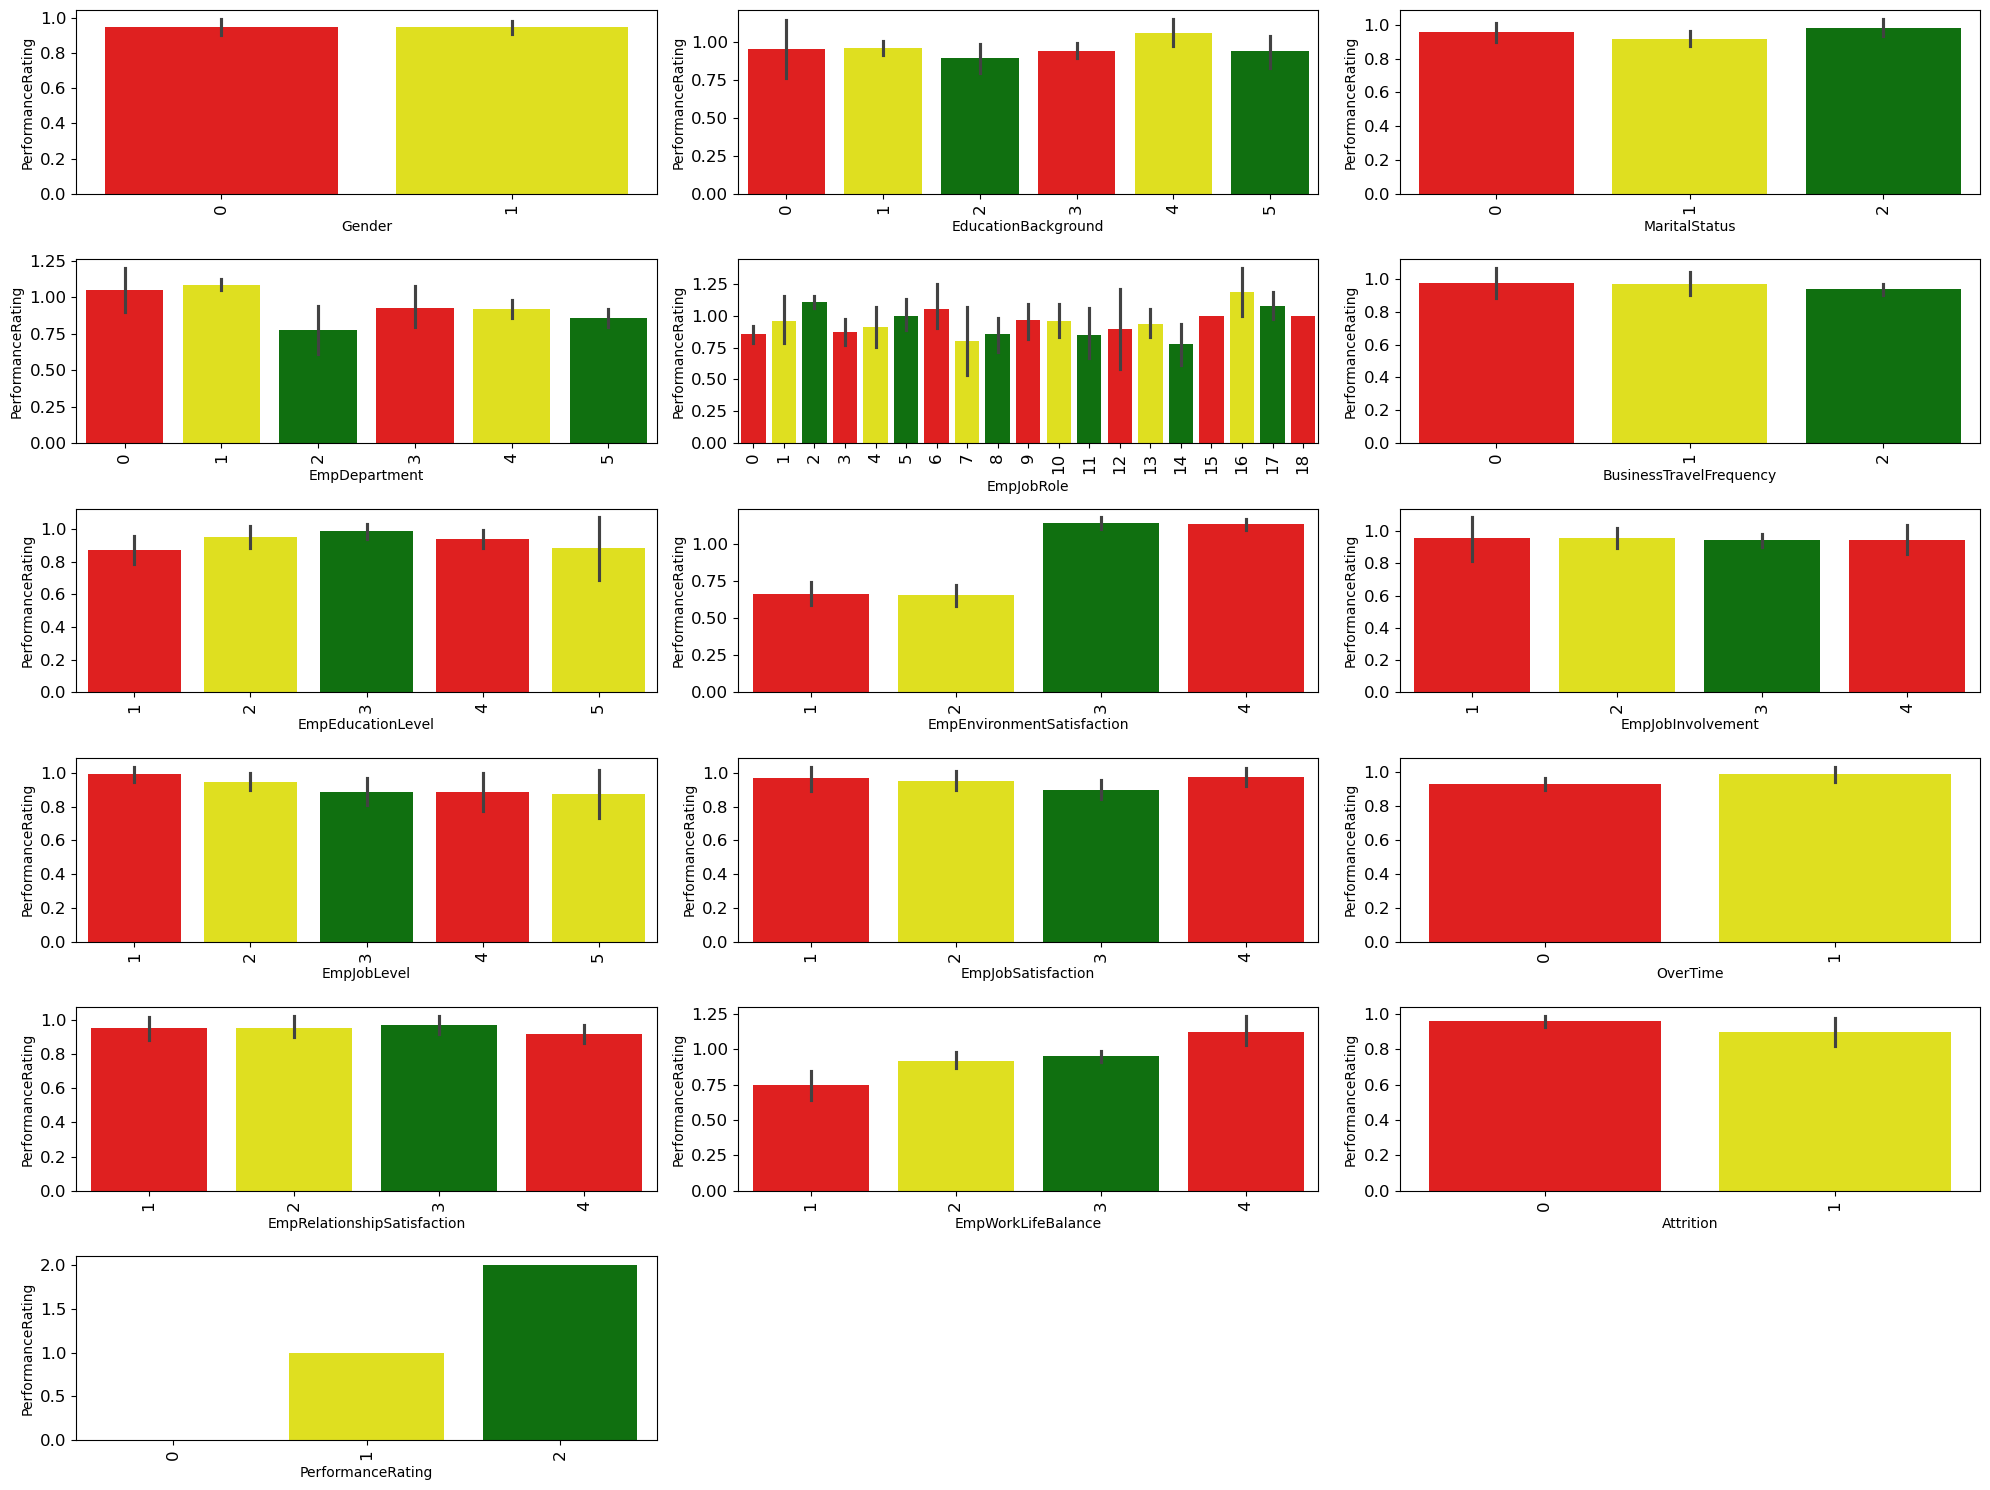

In [63]:
# Correlational Analysis for Categorial Data

plt.figure(figsize=(20, 15))                       # Set canvas size
plotnumber = 1                                     # Initialize plot counter

# Iterate through categorical columns
for i in categorial_data.columns:
    plt.subplot(6, 3, plotnumber)                  # Set subplot grid (6 rows, 3 columns)
    
    # Create a barplot with hue for PerformanceRating
    sns.barplot(x=df[i], y=df['PerformanceRating'], palette=["red", "yellow", "green"])
    
    # Customize tick labels
    plt.xticks(rotation=90, fontsize=12)           # Rotate x-tick labels and set size
    plt.yticks(fontsize=12)                        # Set y-tick size
    
    plotnumber += 1                                # Increment plot counter

plt.tight_layout()                                 # Avoid overlapping
plt.show()

**Employee Performance Insights**

- Gender Performance:

Male and female employees perform similarly, with no significant difference in their performance levels.

- Educational Background:

Employees with backgrounds in Life Sciences, Medicine, and Marketing tend to have poor performance.

- Marital Status:

Married employees exhibit lower performance compared to their single or divorced counterparts.

- Department Performance:

Employees in the Sales and Research & Development departments show poor performance.

- Job Role:

Sales Executive employees tend to have lower performance.

- Business Travel:

Employees who rarely travel for work exhibit poor performance.

- Education Level:

Employees with education levels 3 and 4 tend to have lower performance.

- Job Environment Satisfaction:

Employees who are not satisfied with their job environment show very poor performance.

- Job Involvement:

Employees with low or high job involvement tend to have poor performance.

- Job Level:

Employees at Job Level 5 exhibit lower performance.

- Relationship Satisfaction:

Employees with low relationship satisfaction (with colleagues or seniors) have poor performance.

- Work-Life Balance:

Employees who do not maintain a balanced work-life tend to have lower performance.

- Attrition:

Employees who are considering leaving the company (attrition) show poor performance.

**Key Insights:**
- Department, job role, and education level significantly impact employee performance.

- Job satisfaction (environment, relationship, and work-life balance) plays a crucial role in determining performance.

- Marital status and business travel frequency also influence performance levels.

- Employees at higher job levels (e.g., Level 5) or with extreme job involvement (too high or too low) struggle with performance.

When analyzing employee performance data, there are many other variables and relationships one can explore beyond just performance ratings. These additional graphs can provide deeper insights into the factors influencing performance, employee demographics and organizational trends. Below are some examples of other graphs one can create, along with their purposes and explanations.


**(i)Employee Tenure Distribution**

Purpose: Understand how long employees typically stay in the organization.

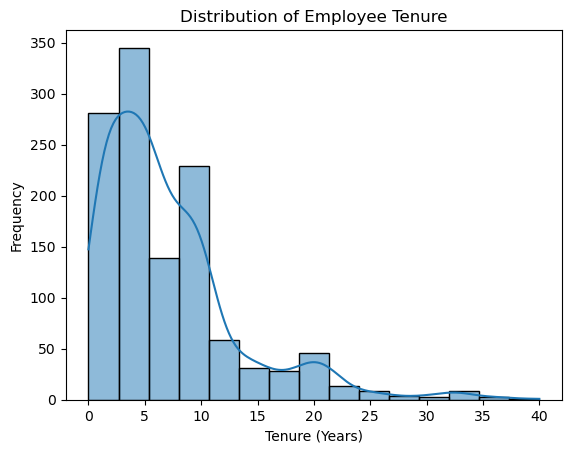

In [67]:
sns.histplot(df['ExperienceYearsAtThisCompany'], kde=True, bins=15)
plt.title('Distribution of Employee Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()

Explanation: This graph shows how employee tenure is distributed. For example, a peak at lower tenure might indicate high turnover.

**(ii)Training Hours Distribution**

Purpose: Analyze how training hours are distributed across employees.

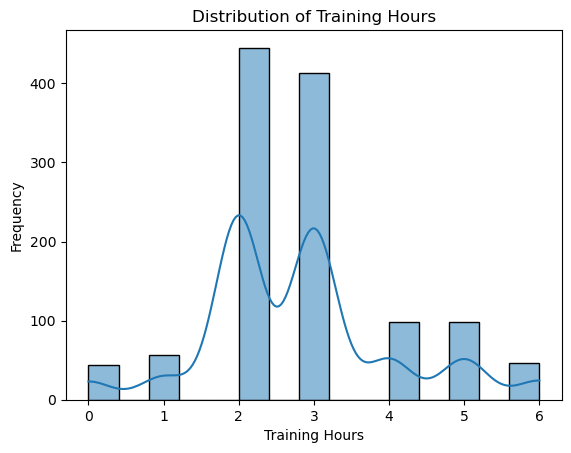

In [70]:
sns.histplot(df['TrainingTimesLastYear'], kde=True, bins=15)
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Frequency')
plt.show()

Explanation: This graph helps identify whether most employees receive similar training or if there are outliers.

**(iii)Employee Age Distribution**

Purpose: Understand the age demographics of the workforce.

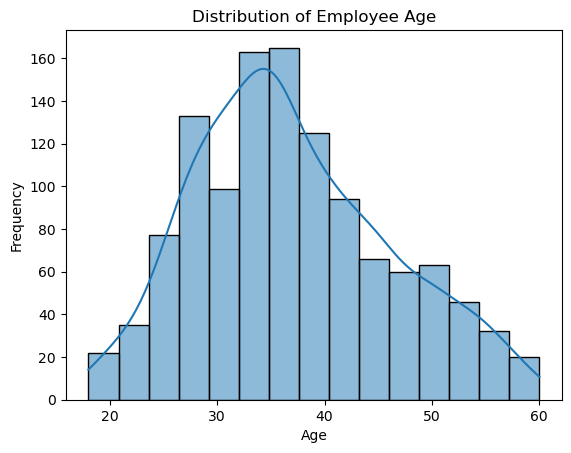

In [73]:
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Distribution of Employee Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Explanation: This graph shows the age distribution of employees, which can help identify generational trends.

**(iv)Gender Distribution**

Purpose: Analyze the gender composition of the workforce.

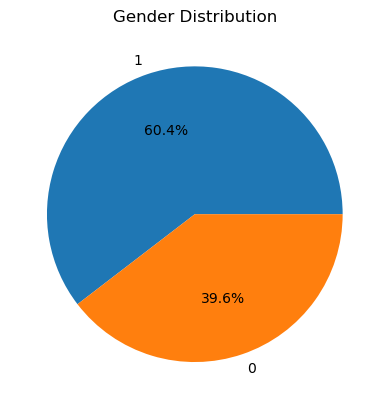

In [76]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

Explanation: This graph provides insights into the gender diversity of the organization.

**(v)Department Size**

Purpose: Compare the number of employees in each department.

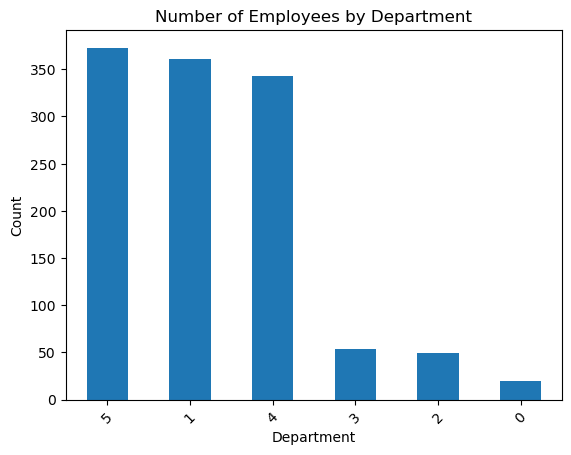

In [79]:
df['EmpDepartment'].value_counts().plot(kind='bar')
plt.title('Number of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Explanation: This graph helps identify which departments are larger or smaller, which might influence resource allocation.

**(vi)Employee Turnover by Department**

Purpose: Analyze which departments have the highest turnover rates.

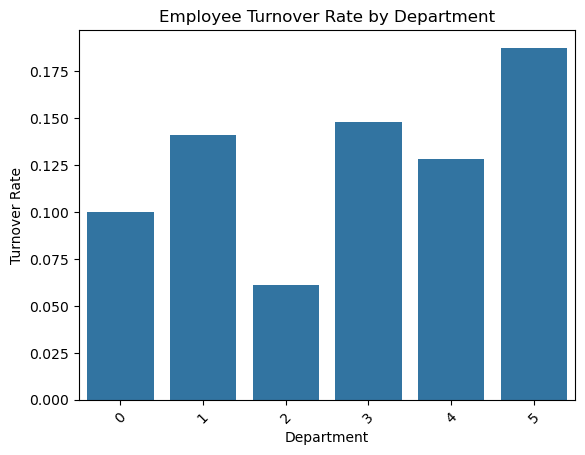

In [82]:
turnover = df.groupby('EmpDepartment')['Attrition'].mean().reset_index()
sns.barplot(x='EmpDepartment', y='Attrition', data=turnover)
plt.title('Employee Turnover Rate by Department')
plt.xlabel('Department')
plt.ylabel('Turnover Rate')
plt.xticks(rotation=45)
plt.show()

Explanation: This graph helps identify departments with high turnover, which might indicate issues like poor management or low job satisfaction.

**(vii)Job Role Distribution**

Purpose: Understand the distribution of employees across job roles.

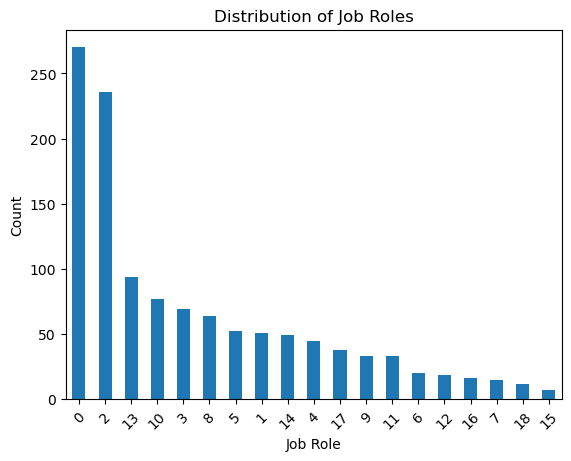

In [85]:
df['EmpJobRole'].value_counts().plot(kind='bar')
plt.title('Distribution of Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Explanation: This graph shows how employees are distributed across different job roles, which can help identify overstaffed or understaffed roles.

**(viii)Salary Distribution**

Purpose: Analyze the distribution of employee salaries.

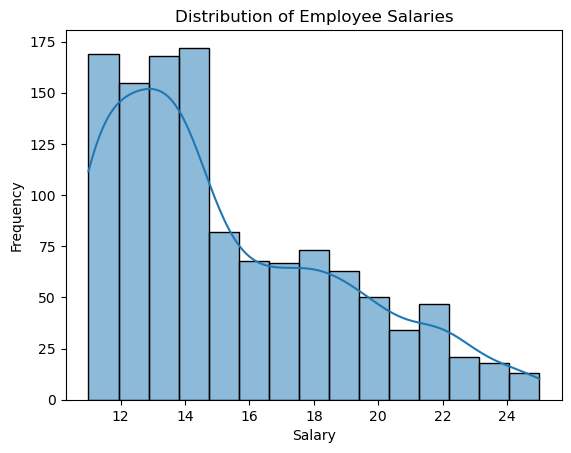

In [88]:
sns.histplot(df['EmpLastSalaryHikePercent'], kde=True, bins=15)
plt.title('Distribution of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Explanation: This graph helps identify salary trends and outliers, which can inform compensation strategies.

**(ix)Salary by Job Role**

Purpose: Compare salaries across different job roles.

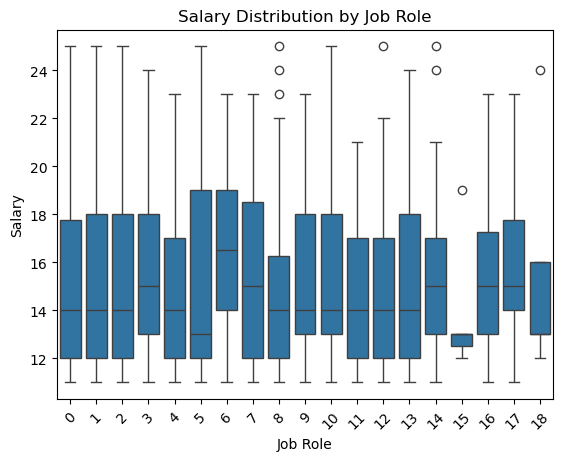

In [91]:
sns.boxplot(x='EmpJobRole', y='EmpLastSalaryHikePercent', data=df)
plt.title('Salary Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

Explanation: This graph helps identify whether certain job roles are paid significantly more or less than others.

**(x)Employee Satisfaction Scores**

Purpose: Analyze employee satisfaction levels.

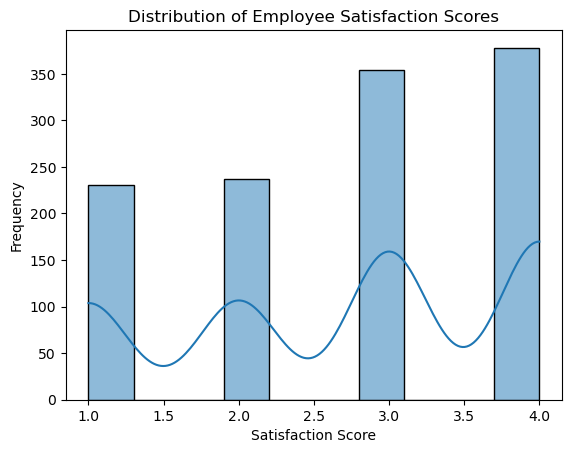

In [94]:
sns.histplot(df['EmpJobSatisfaction'], kde=True, bins=10)
plt.title('Distribution of Employee Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()

Explanation: This graph shows how satisfied employees are overall, which can help identify areas for improvement.

**(xi)Satisfaction by Department**

Purpose: Compare satisfaction scores across departments.

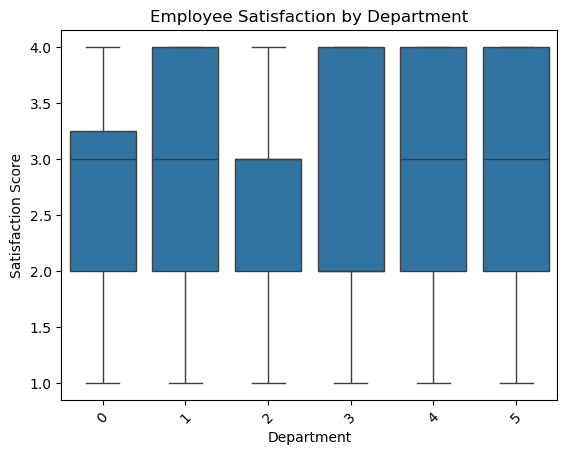

In [97]:
sns.boxplot(x='EmpDepartment', y='EmpJobSatisfaction', data=df)
plt.title('Employee Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Satisfaction Score')
plt.xticks(rotation=45)
plt.show()

Explanation: This graph helps identify departments with low satisfaction, which might require intervention.

**(xii)Promotion Rates by Department**

Purpose: Analyze which departments have the highest promotion rates.

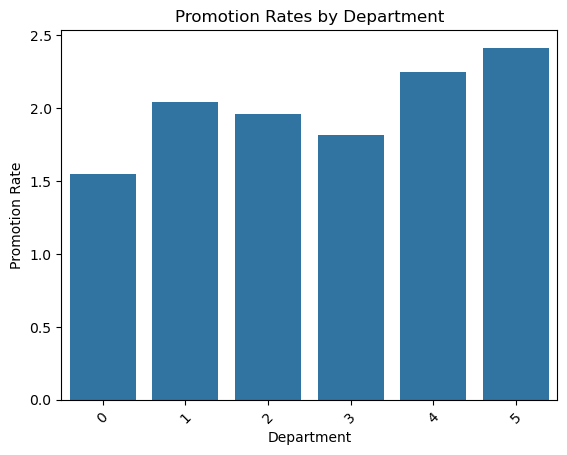

In [100]:
promotion_rates = df.groupby('EmpDepartment')['YearsSinceLastPromotion'].mean().reset_index()
sns.barplot(x='EmpDepartment', y='YearsSinceLastPromotion', data=promotion_rates)
plt.title('Promotion Rates by Department')
plt.xlabel('Department')
plt.ylabel('Promotion Rate')
plt.xticks(rotation=45)
plt.show()

Explanation: This graph helps identify departments with high or low promotion rates, which might reflect career growth opportunities.

**(xiii)Correlation Between Satisfaction and Tenure**

Purpose: Analyze if employee satisfaction is related to tenure.

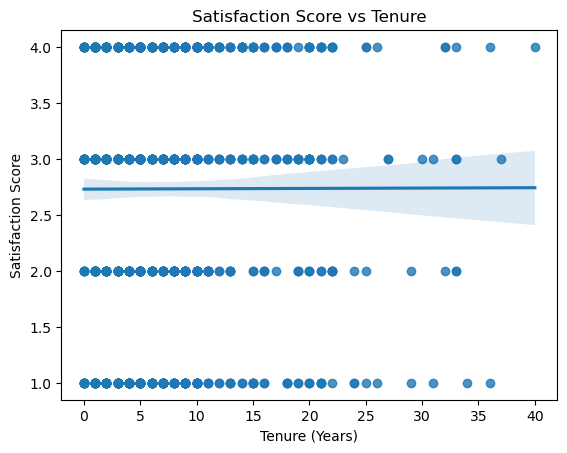

In [103]:
sns.regplot(x='ExperienceYearsAtThisCompany', y='EmpJobSatisfaction', data=df)
plt.title('Satisfaction Score vs Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Satisfaction Score')
plt.show()

Explanation: This graph helps determine if longer-tenured employees are more or less satisfied.

**(xiv)Attrition Analysis**

Purpose: Analyze the reasons for employee attrition.

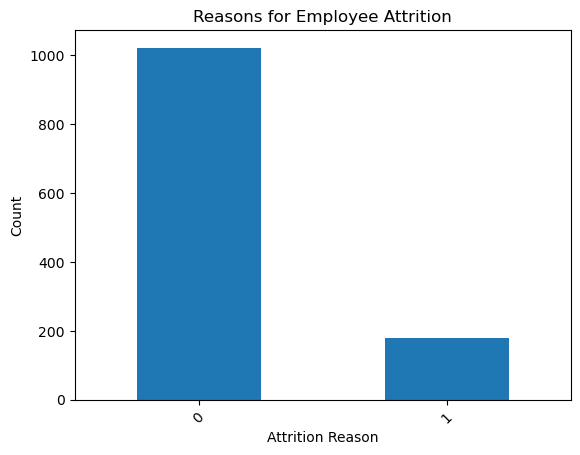

In [106]:
df['Attrition'].value_counts().plot(kind='bar')
plt.title('Reasons for Employee Attrition')
plt.xlabel('Attrition Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Explanation: This graph helps identify the most common reasons employees leave the organization.

**(xv)Work-Life Balance Scores**

Purpose: Analyze employee work-life balance.

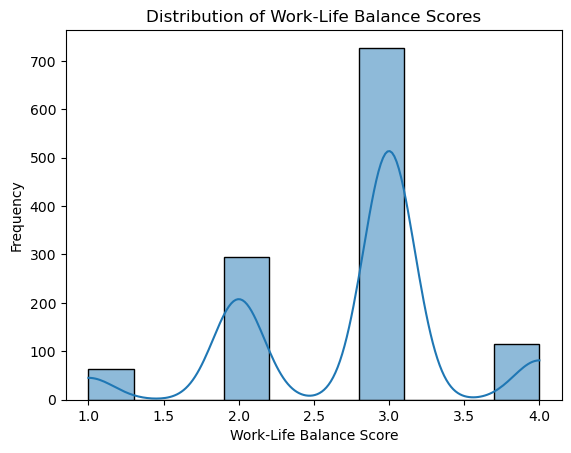

In [109]:
sns.histplot(df['EmpWorkLifeBalance'], kde=True, bins=10)
plt.title('Distribution of Work-Life Balance Scores')
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Frequency')
plt.show()

Explanation: This graph shows how employees perceive their work-life balance, which can inform policies to improve employee well-being.

**3. Relational Plots**

It visualizes relationships between two or more variables in a dataset. In the context of employee performance analysis, relational plots can help uncover patterns, correlations and trends between variables like tenure, salary, training hours, satisfaction scores and performance ratings. Below are examples of relational plots created using the dataset with explanations.


**(i) Relationship between salary and performance rating**

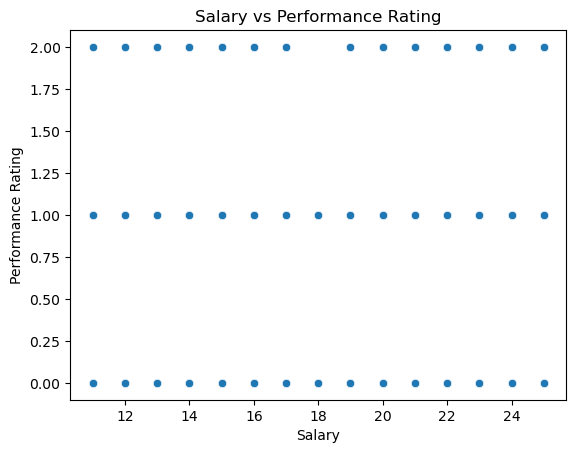

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='EmpLastSalaryHikePercent', y='PerformanceRating', data=df)
plt.title('Salary vs Performance Rating')
plt.xlabel('Salary')
plt.ylabel('Performance Rating')
plt.show()

This plot helps identify whether higher salaries are associated with better performance ratings.

**(ii) Trend of average performance rating over tenure**

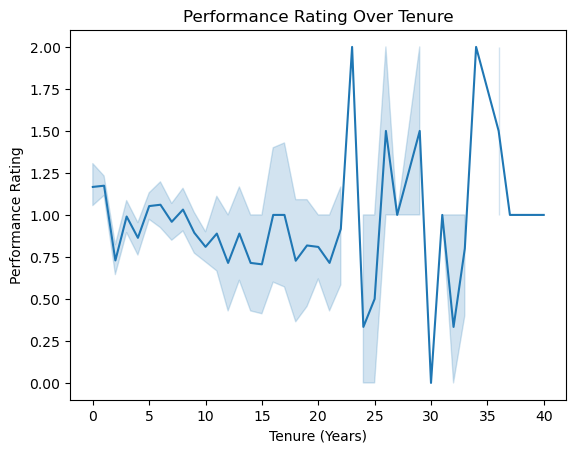

In [116]:
sns.lineplot(x='ExperienceYearsAtThisCompany', y='PerformanceRating', data=df)
plt.title('Performance Rating Over Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Performance Rating')
plt.show()

This plot helps analyze whether performance improves or declines with longer tenure.

**(iii) Relationship between training hours and performance rating, colored by department**

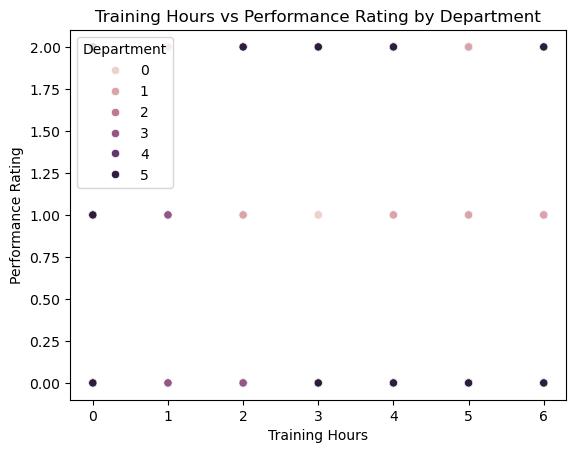

In [119]:
sns.scatterplot(x='TrainingTimesLastYear', y='PerformanceRating', hue='EmpDepartment', data=df)
plt.title('Training Hours vs Performance Rating by Department')
plt.xlabel('Training Hours')
plt.ylabel('Performance Rating')
plt.legend(title='Department')
plt.show()

This plot helps identify whether the relationship between training and performance varies by department.

**(iv) Relationships between salary, tenure, training hours, and performance rating**

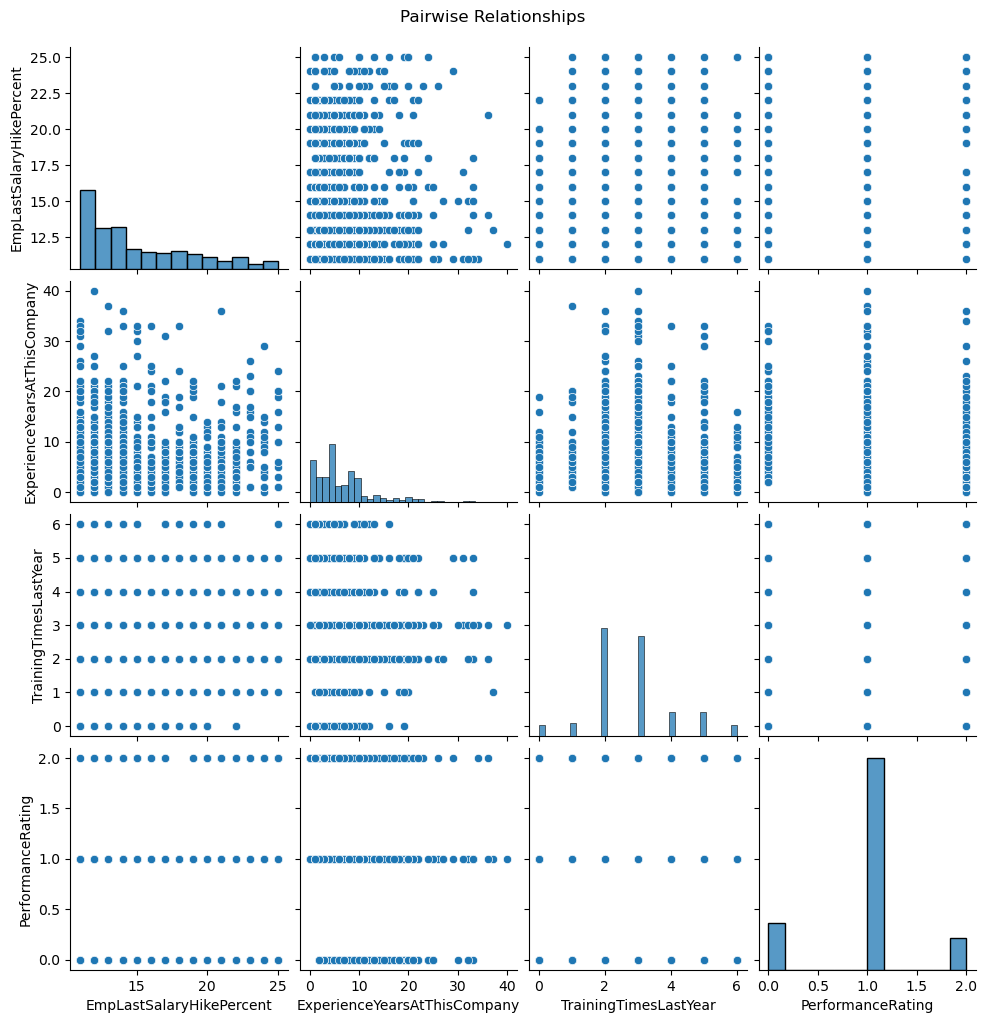

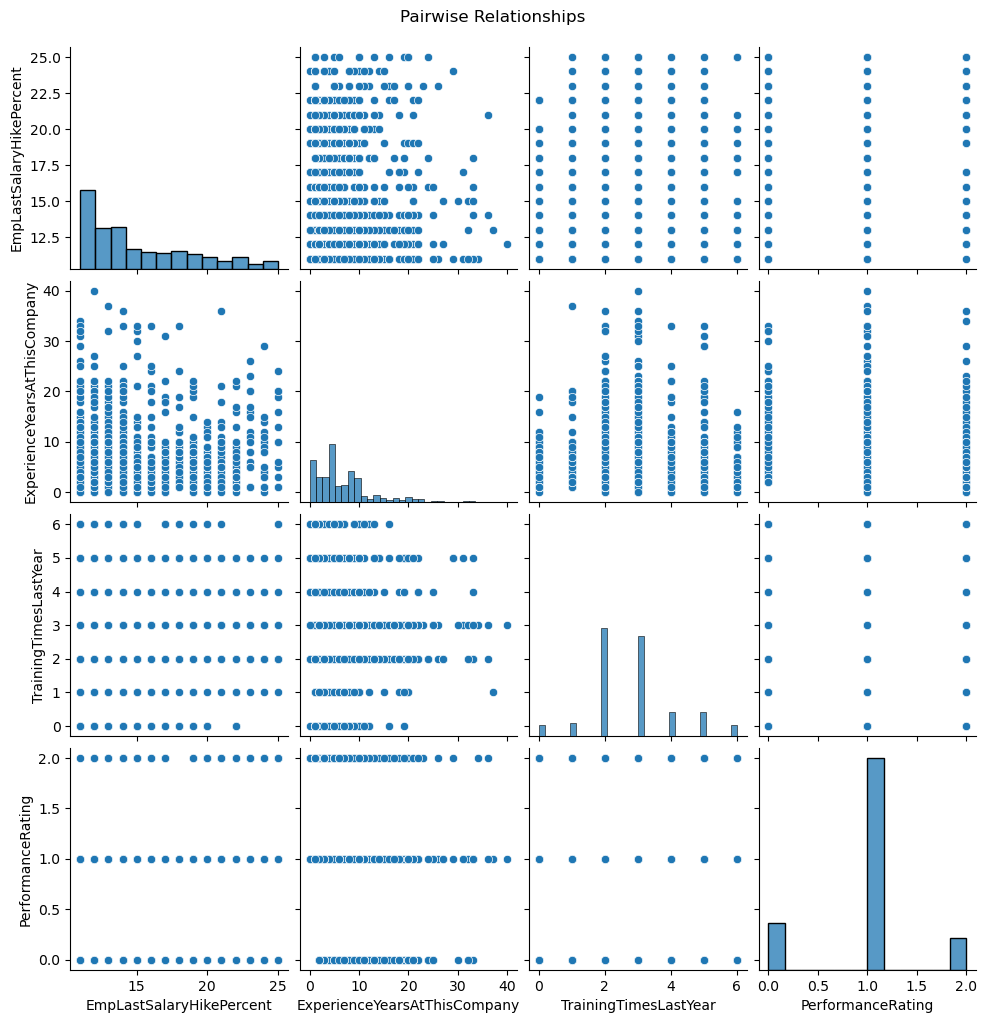

In [122]:
sns.pairplot(df[['EmpLastSalaryHikePercent', 'ExperienceYearsAtThisCompany', 'TrainingTimesLastYear', 'PerformanceRating']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show() 
sns.pairplot(df[['EmpLastSalaryHikePercent', 'ExperienceYearsAtThisCompany', 'TrainingTimesLastYear', 'PerformanceRating']])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

 This plot provides a comprehensive view of relationships between multiple variables in one visualization.

**(v) Correlation between salary, tenure, training hours, and performance rating**

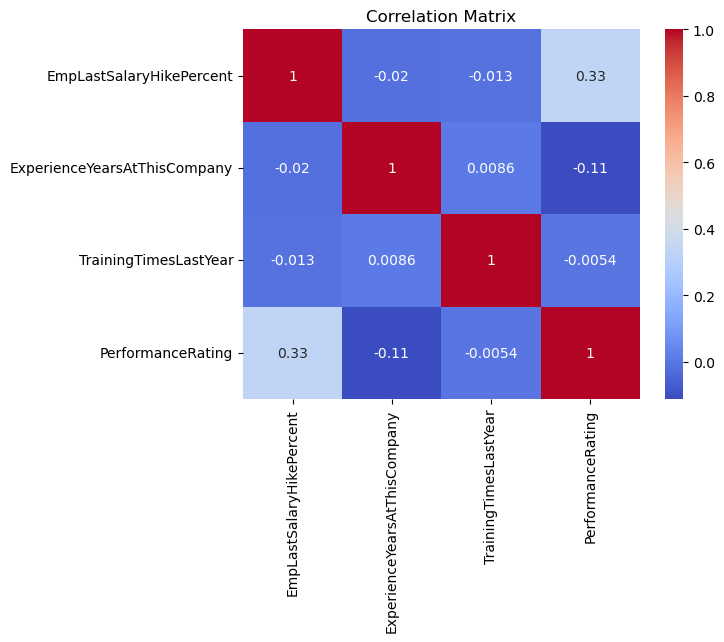

In [125]:
corr_matrix = df[['EmpLastSalaryHikePercent', 'ExperienceYearsAtThisCompany', 'TrainingTimesLastYear', 'PerformanceRating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

This plot helps identify strong positive or negative correlations between variables.

**(vi) Relationship between training hours and performance rating, split by department**

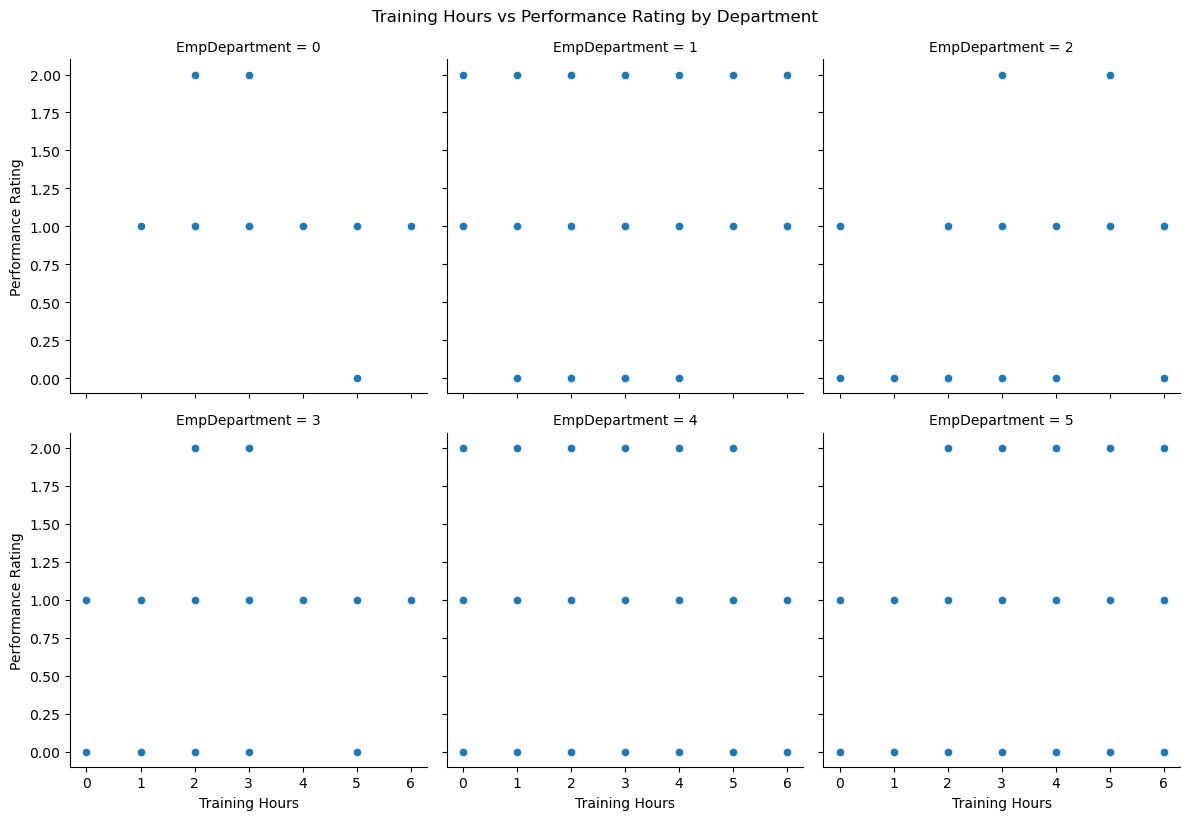

In [128]:
g = sns.FacetGrid(df, col='EmpDepartment', col_wrap=3, height=4)
g.map(sns.scatterplot, 'TrainingTimesLastYear', 'PerformanceRating')
g.set_axis_labels('Training Hours', 'Performance Rating')
g.fig.suptitle('Training Hours vs Performance Rating by Department', y=1.02)
plt.show()

 This plot allows you to compare relationships across different departments.

**(vii) Relationship between salary and performance rating with marginal distributions**

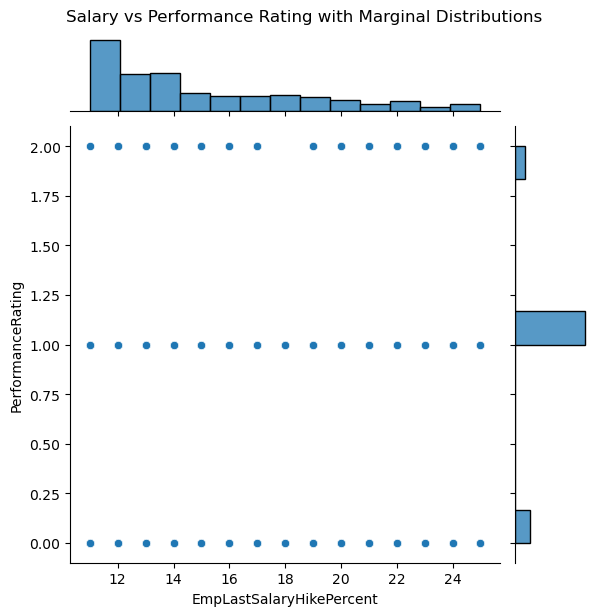

In [131]:
sns.jointplot(x='EmpLastSalaryHikePercent', y='PerformanceRating', data=df, kind='scatter')
plt.suptitle('Salary vs Performance Rating with Marginal Distributions', y=1.02)
plt.show()

This plot provides both the relationship between two variables and their individual distributions.

**(viii) Relationship between training hours and performance rating with a regression line**

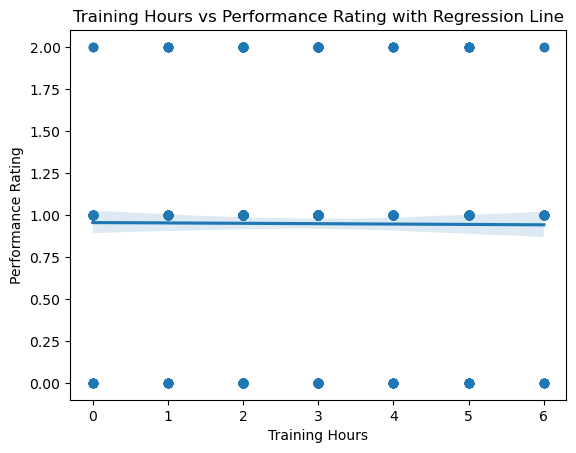

In [134]:
sns.regplot(x='TrainingTimesLastYear', y='PerformanceRating', data=df)
plt.title('Training Hours vs Performance Rating with Regression Line')
plt.xlabel('Training Hours')
plt.ylabel('Performance Rating')
plt.show()

This plot helps identify the trend and strength of the relationship between two variables.

**(ix) Relationship between salary and performance rating, with point size representing tenure**

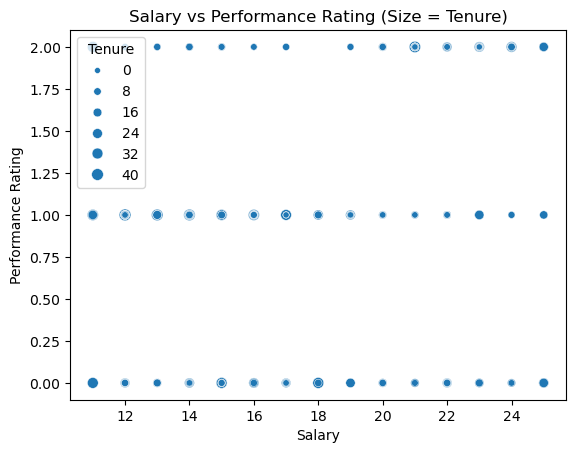

In [137]:
sns.scatterplot(x='EmpLastSalaryHikePercent', y='PerformanceRating', size='ExperienceYearsAtThisCompany', data=df)
plt.title('Salary vs Performance Rating (Size = Tenure)')
plt.xlabel('Salary')
plt.ylabel('Performance Rating')
plt.legend(title='Tenure')
plt.show()

This plot helps visualize the impact of a third numerical variable (tenure) on the relationship between salary and performance.

**(x) Relationship between training hours and performance rating, with point style representing gender**

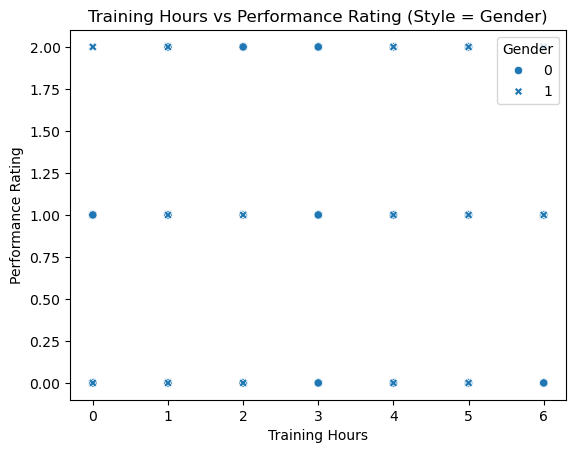

In [140]:
sns.scatterplot(x='TrainingTimesLastYear', y='PerformanceRating', style='Gender', data=df)
plt.title('Training Hours vs Performance Rating (Style = Gender)')
plt.xlabel('Training Hours')
plt.ylabel('Performance Rating')
plt.legend(title='Gender')
plt.show()

 This plot helps analyze whether the relationship between training and performance differs by gender.

**Feature Selection**

It emphasizes on identifying and selecting the most relevant features (variables) from a dataset to improve model performance, reduce overfitting, and enhance interpretability. It helps in focusing on the most important data for accurate predictions.

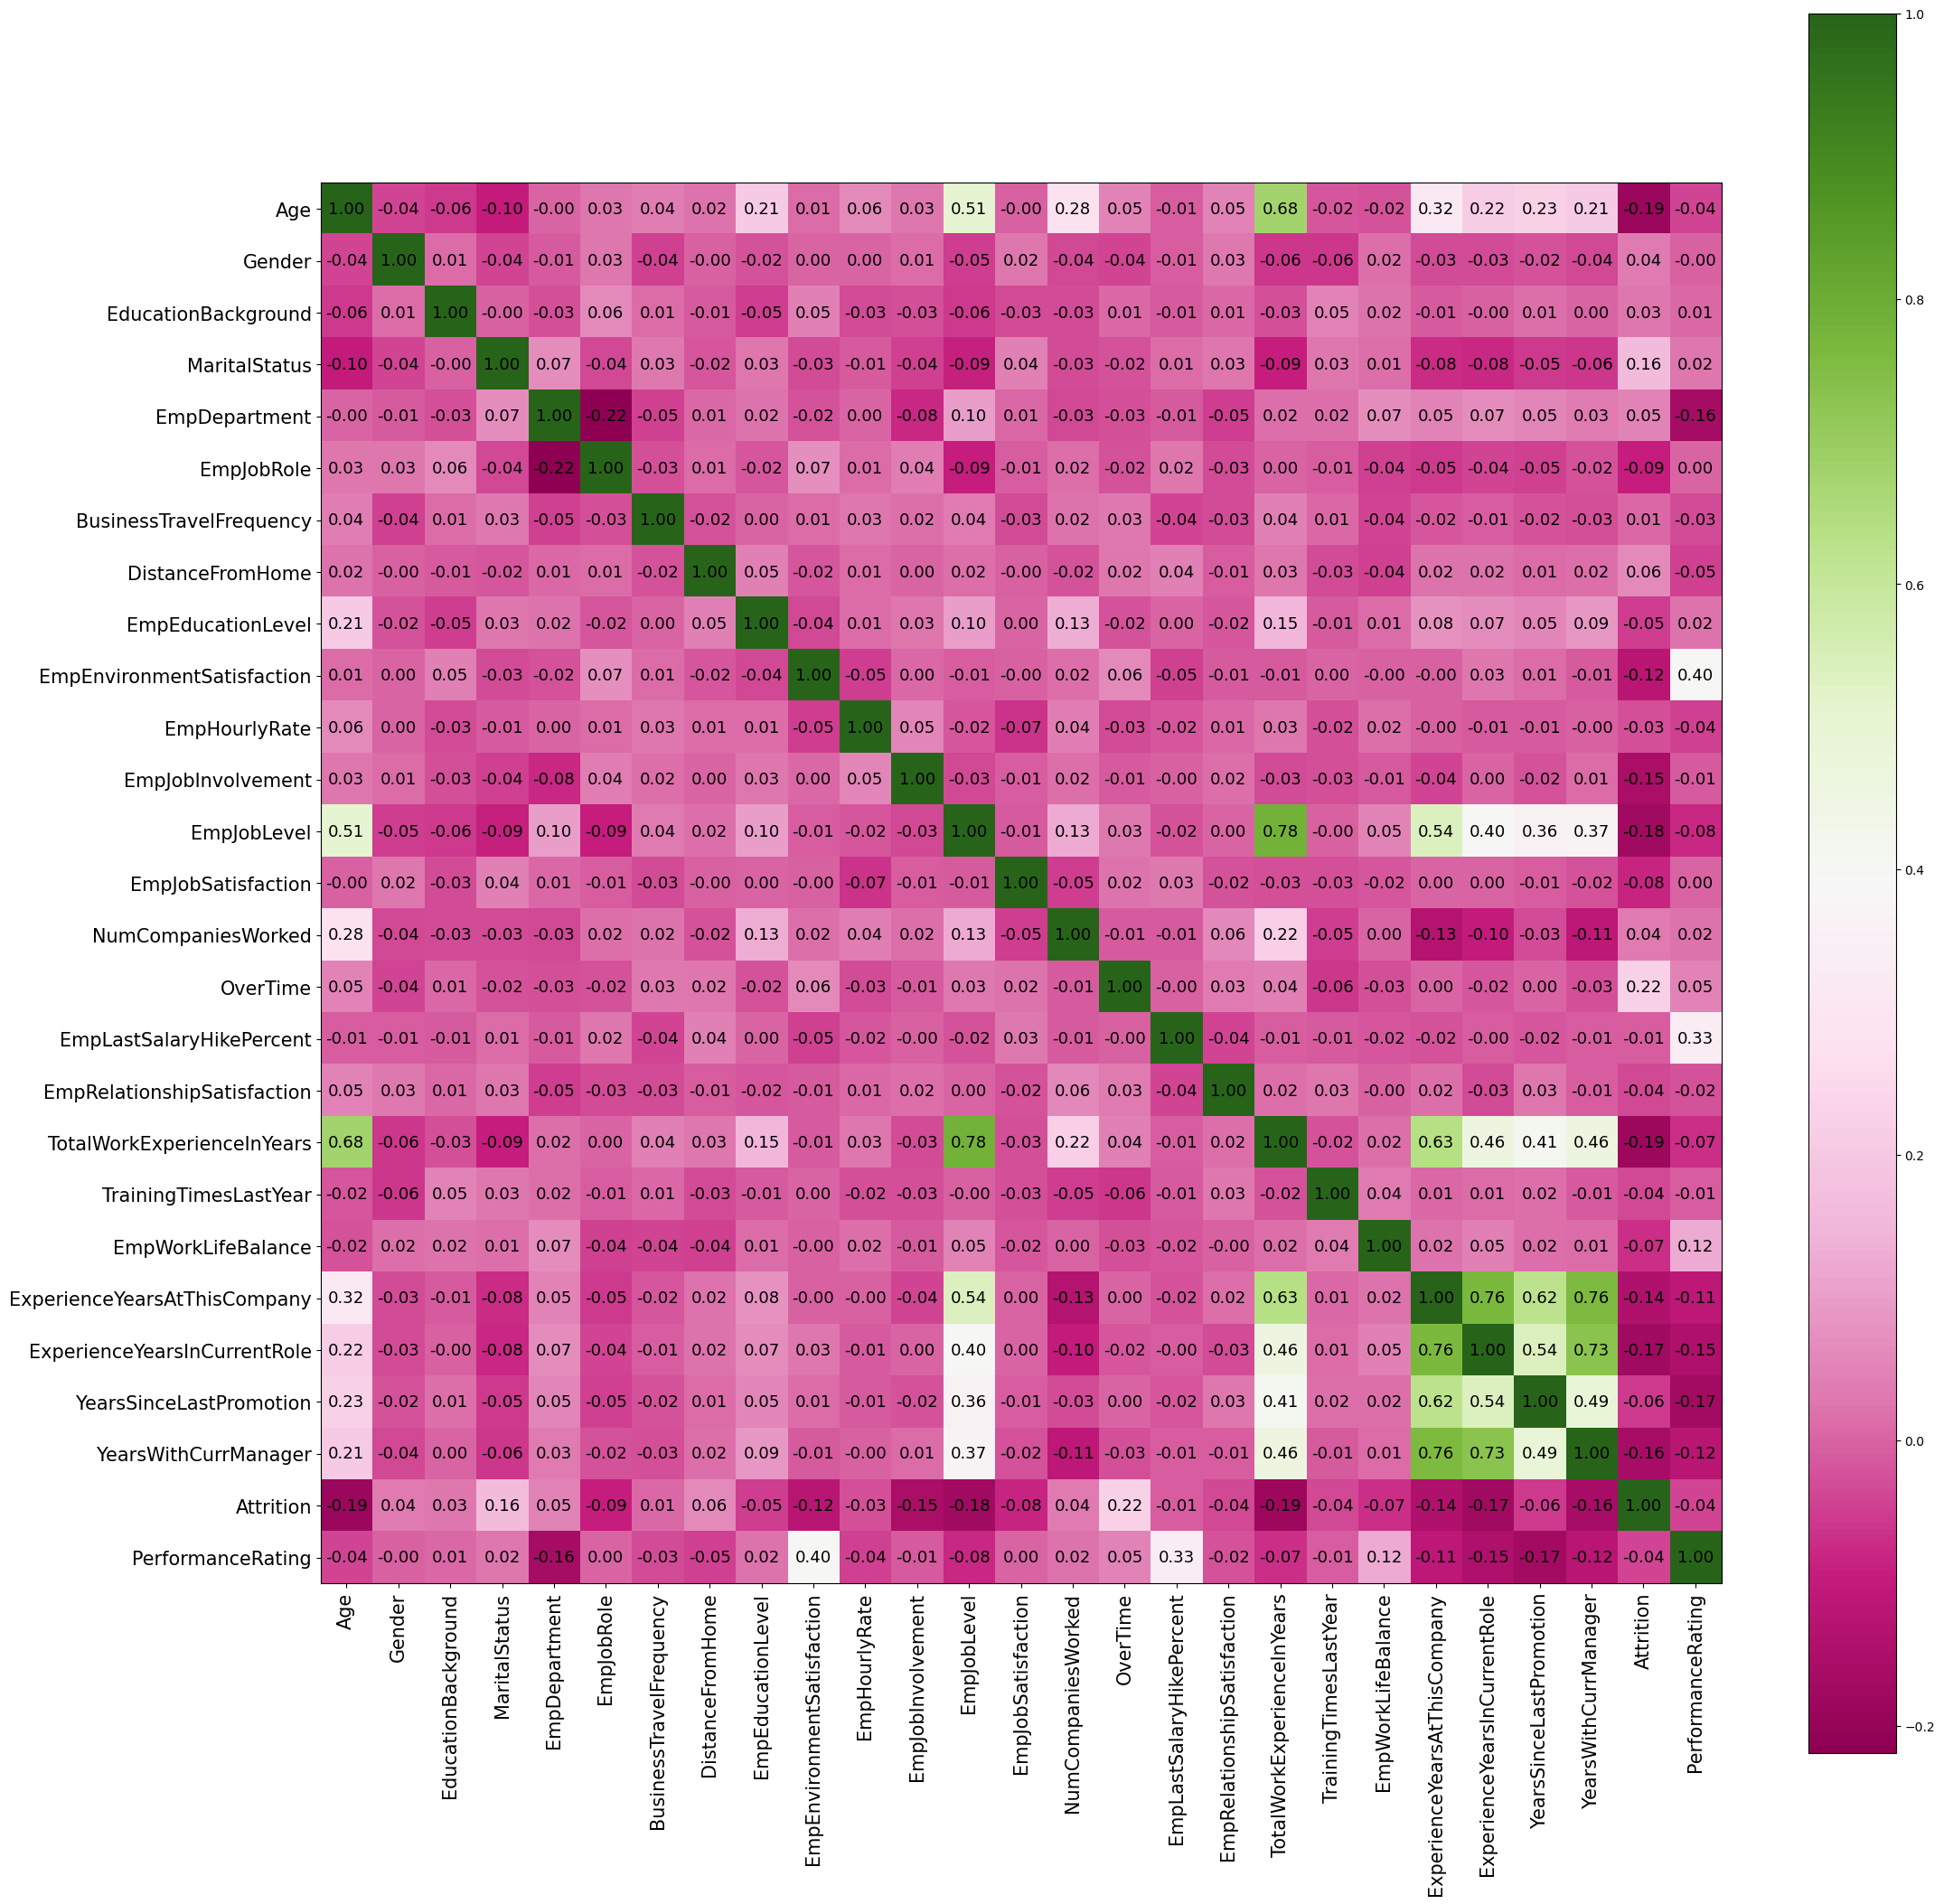

In [143]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap using matplotlib
plt.figure(figsize=(25, 25))
plt.imshow(corr_matrix, cmap='PiYG', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, fontsize=15, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.columns, fontsize=15)

# Add annotations
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black", fontsize=13)

plt.show()

In [144]:
# Finding out the correlation coeffecient to find out which predictors are significant.
df.corr()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
Age,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,0.025341,0.040579,0.020937,0.207313,0.013814,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.026363,-0.043608,-0.001507,-0.022960,0.000033,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,-0.055905,0.009922,1.000000,-0.001097,-0.026874,0.064783,0.012382,-0.013919,-0.047978,0.045028,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.098368,-0.042169,-0.001097,1.000000,0.067272,-0.036401,0.028520,-0.019148,0.026737,-0.032467,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.000104,-0.010925,-0.026874,0.067272,1.000000,-0.219250,-0.045233,0.007707,0.019175,-0.019237,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,0.025341,0.026363,0.064783,-0.036401,-0.219250,1.000000,-0.027771,0.012555,-0.017779,0.072485,...,-0.033258,0.001472,-0.009406,-0.044821,-0.053419,-0.039324,-0.047282,-0.023686,-0.092632,0.003858
BusinessTravelFrequency,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.027771,1.000000,-0.020935,0.002064,0.012267,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.012555,-0.020935,1.000000,0.045856,-0.017719,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.017779,0.002064,0.045856,1.000000,-0.037103,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529
EmpEnvironmentSatisfaction,0.013814,0.000033,0.045028,-0.032467,-0.019237,0.072485,0.012267,-0.017719,-0.037103,1.000000,...,-0.010504,-0.012894,0.001192,-0.000262,-0.000561,0.025491,0.010732,-0.011702,-0.123490,0.395561


**Key Insights from the Correlation Matrix**

**1. Strong Positive Correlations:**

- Age and TotalWorkExperienceInYears (0.68): As age increases, total work experience also increases.

- ExperienceYearsAtThisCompany and ExperienceYearsInCurrentRole (0.76): Employees with more years at the company tend to have more years in their current role.

- EmpJobLevel and TotalWorkExperienceInYears (0.78): Higher job levels are associated with more work experience.

**2. Strong Negative Correlations:**

- Attrition and TotalWorkExperienceInYears (-0.19): Employees with less work experience are more likely to leave the company.

- Attrition and EmpEnvironmentSatisfaction (-0.12): Lower satisfaction with the work environment increases the likelihood of attrition.

**3. Moderate Positive Correlations:**

- EmpEnvironmentSatisfaction and PerformanceRating (0.40): Higher environment satisfaction is associated with better performance ratings.

- EmpLastSalaryHikePercent and PerformanceRating (0.33): Employees with higher salary hikes tend to have better performance ratings.

**4. Weak or No Correlations:**

- Gender, EducationBackground, and TrainingTimesLastYear show little to no correlation with the target variable (PerformanceRating).

- EmpJobSatisfaction and PerformanceRating (0.0006): Job satisfaction has almost no impact on performance ratings.

**5. Other Notable Correlations:**

- EmpWorkLifeBalance and PerformanceRating (0.12): Better work-life balance is slightly associated with higher performance.

- YearsSinceLastPromotion and PerformanceRating (-0.17): Employees who haven't been promoted recently tend to have lower performance ratings.


**Feature Selection Implications**

**1. Drop Weakly Correlated Features:**

Features like Gender, EducationBackground, and TrainingTimesLastYear can be dropped as they have little impact on the target variable.

**2. Focus on Strongly Correlated Features:**

EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, and EmpWorkLifeBalance are the most influential features affecting performance ratings.

In [146]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Filter columns with correlation coefficient > 0.1 (absolute value) with the target variable
target_variable = 'PerformanceRating'  # Replace with your target variable name
high_corr_features = corr_matrix[abs(corr_matrix[target_variable]) > 0.1].index

# Create a new DataFrame with only the selected features
filtered_data = df[high_corr_features]

# Display the filtered DataFrame
print(filtered_data.head())

   EmpDepartment  EmpEnvironmentSatisfaction  EmpLastSalaryHikePercent  \
0              5                           4                        12   
1              5                           4                        12   
2              5                           4                        21   
3              3                           2                        15   
4              5                           1                        14   

   EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                   2                            10   
1                   3                             7   
2                   3                            18   
3                   2                            21   
4                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13             

**Train-Test Split**

Its the process of dividing a dataset into two subsets: a training set (used to train a model) and a testing set (used to evaluate the model's performance). This helps assess how well the model generalizes to unseen data and prevents overfitting. 

In [148]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = filtered_data.drop('PerformanceRating', axis=1)  # Replace 'PerformanceRating' with your target column
y = filtered_data['PerformanceRating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (960, 8)
X_test shape: (240, 8)
y_train shape: (960,)
y_test shape: (240,)


**Feature Scaling**

Is about normalizing or standardizing the range of features in a dataset to ensure they are on a similar scale to perform effectively and avoid bias toward features with larger magnitudes. Common techniques include Standardization (mean = 0, variance = 1) and Normalization (scaling to a range, e.g., 0 to 1).

In [151]:
# Standardization technique is used
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:
X_train.shape, X_test.shape

((960, 8), (240, 8))

**Modeling**

Lets compute to create models that represent, analyze and predict patterns within the data and make predictions.

**(i) Training a Logistic Regression Classifier**

In [155]:
# Import the Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model_lr = LogisticRegression(random_state=42)

# Train the model on the training data
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

**(ii) Training a Decision Tree Classifier**

In [157]:
# Import the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model_dt = DecisionTreeClassifier(random_state=42)

# Train the model
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**(iii) Training a Support Vector Machine (SVM) Classifier**

In [159]:
# Import the SVM Classifier
from sklearn.svm import SVC

# Initialize the model
model_svm = SVC(kernel='linear', random_state=42)  # You can change the kernel to 'rbf', 'poly', etc.

# Train the model
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

**(iv) Training a Random Forest (RF) Classifier**

In [161]:
# Import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Train the model on the training data
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

After training the models, lets evaluate their performance using metrics like accuracy, precision, recall, F1-score and confusion matrix.

In [163]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_svm = model_svm.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"SVM Accuracy: {accuracy_svm}")
print(f"Random Forest: {accuracy_rf}")

Logistic Regression Accuracy: 0.85
Decision Tree Accuracy: 0.9083333333333333
SVM Accuracy: 0.8583333333333333
Random Forest: 0.9416666666666667


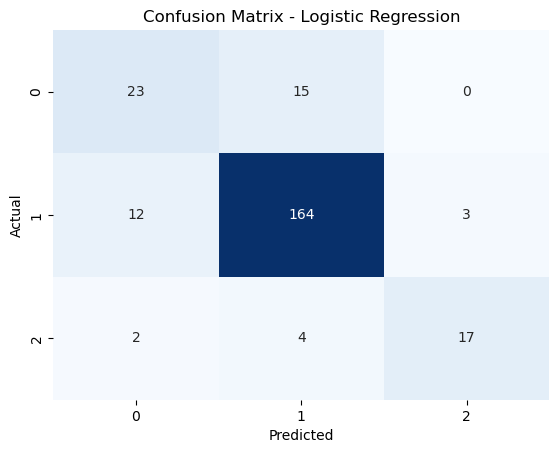

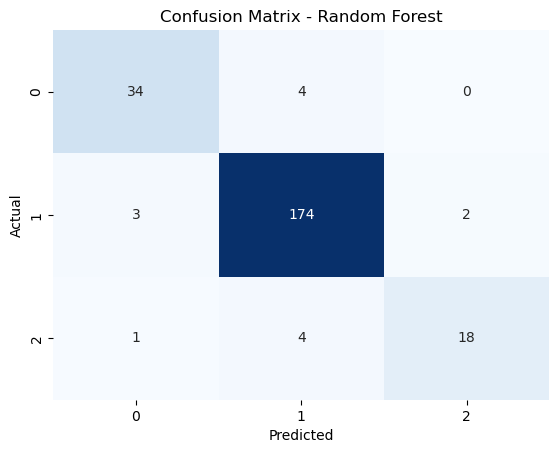

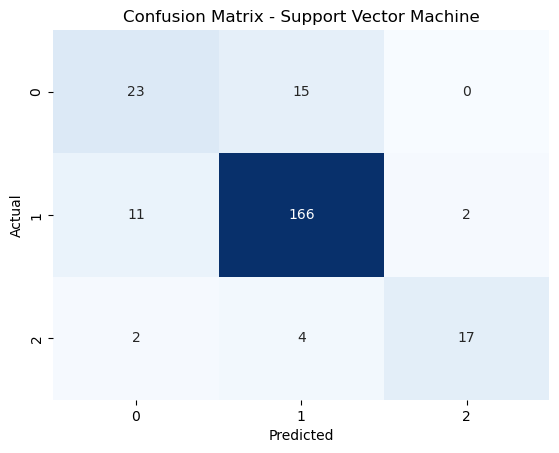

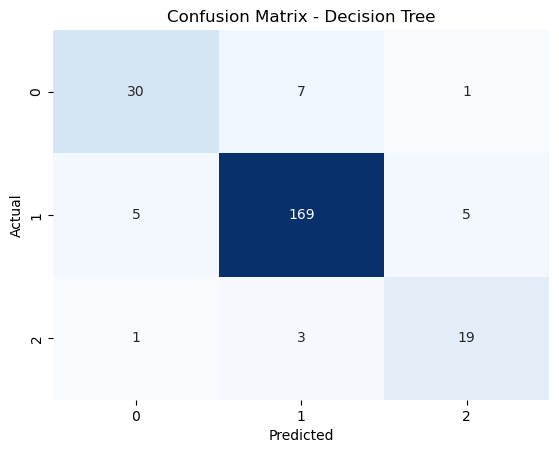

In [164]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Predictions for each model
y_pred_lr = model_lr.predict(X_test)  # Logistic Regression
y_pred_rf = model_rf.predict(X_test)  # Random Forest
y_pred_svm = model_svm.predict(X_test)  # Support Vector Machine
y_pred_dt = model_dt.predict(X_test)  # Decision Tree

# Plot confusion matrices
plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(y_test, y_pred_rf, "Confusion Matrix - Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "Confusion Matrix - Support Vector Machine")
plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix - Decision Tree")

**(v) Training a Naive Bayes Bernoulli Classifier**

In [166]:
# Import the Naive Bayes Bernoulli Classifier
from sklearn.naive_bayes import BernoulliNB

# Initialize the model
model_nb = BernoulliNB()

# Train the model
model_nb.fit(X_train, y_train)

BernoulliNB()

**(vi) Training a K-Nearest Neighbors (K-NN) Classifier**

In [168]:
# Import the K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
model_knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

After training the Naive Bayes and KNN models, lets evaluate their performance.

In [170]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred_nb = model_nb.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"K-NN Accuracy: {accuracy_knn}")

# Generate classification reports
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

print("K-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

Naive Bayes Accuracy: 0.8
K-NN Accuracy: 0.8416666666666667
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60        38
           1       0.82      0.96      0.88       179
           2       0.00      0.00      0.00        23

    accuracy                           0.80       240
   macro avg       0.49      0.50      0.49       240
weighted avg       0.72      0.80      0.75       240

K-NN Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        38
           1       0.89      0.91      0.90       179
           2       0.79      0.65      0.71        23

    accuracy                           0.84       240
   macro avg       0.77      0.73      0.75       240
weighted avg       0.84      0.84      0.84       240



C:\Users\MARYANN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MARYANN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\MARYANN\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**(vii) Training an Artificial Neural Network (ANN) using TensorFlow/Keras**

In [172]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the MLPClassifier
model_mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),  # 3 hidden layers with 100 neurons each
    batch_size=10,  # Mini-batch size for training
    learning_rate_init=0.01,  # Initial learning rate
    max_iter=2000,  # Maximum number of iterations
    random_state=10  # Seed for reproducibility
)

# Train the model
model_mlp.fit(X_train, y_train)

# Predict on the test set
y_predict_mlp = model_mlp.predict(X_test)

# Evaluate the model
# 1. Calculate accuracy
accuracy = accuracy_score(y_test, y_predict_mlp)
print(f"Accuracy: {accuracy}")

# 2. Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_predict_mlp))

# 3. Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict_mlp)
print("Confusion Matrix:")
print(conf_matrix)

# Store accuracy for comparison
ANN_accuracy = accuracy

Accuracy: 0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        38
           1       0.95      0.92      0.93       179
           2       0.82      0.78      0.80        23

    accuracy                           0.90       240
   macro avg       0.84      0.86      0.85       240
weighted avg       0.91      0.90      0.90       240

Confusion Matrix:
[[ 34   4   0]
 [ 11 164   4]
 [  1   4  18]]


**Model Tuning**

Its the process of optimizing a machine learning model's hyperparameters to improve its performance. It involves searching for the best combination of hyperparameters using methods evaluated through metrics like accuracy or AUC. The goal is to enhance the model's predictive power and generalization to new data.


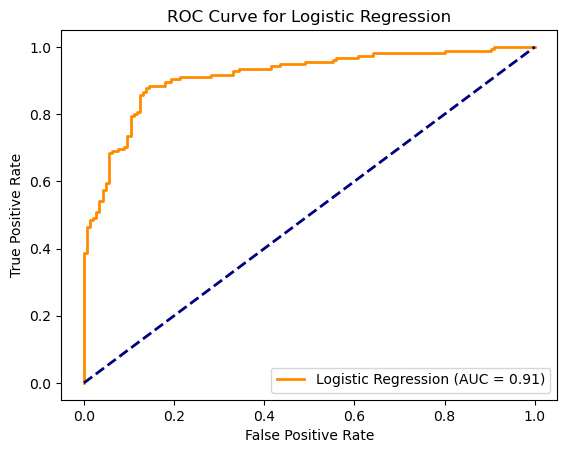

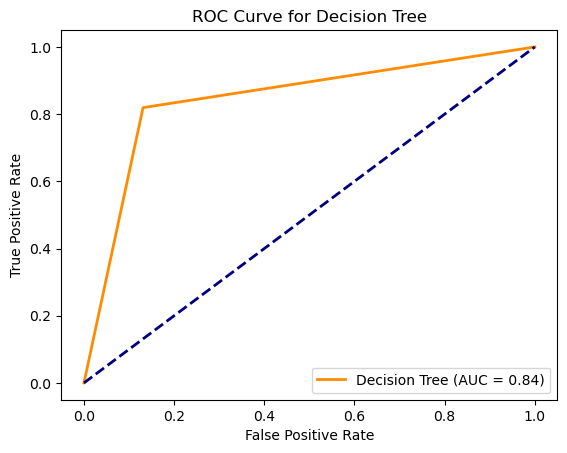

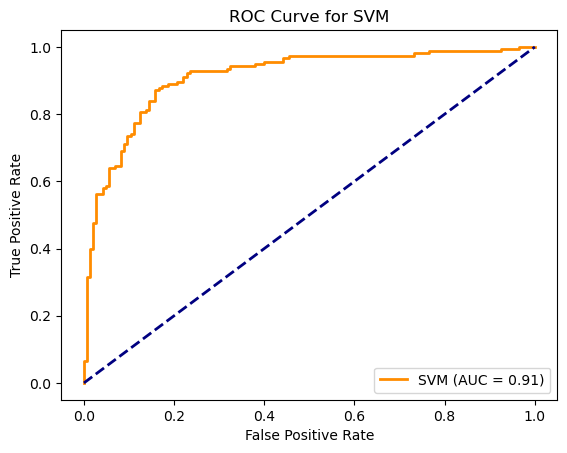

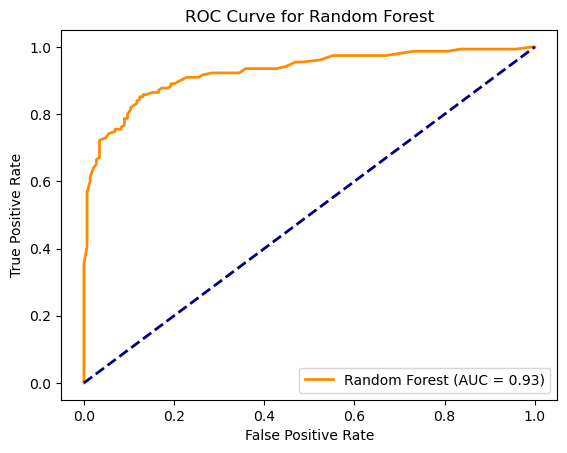

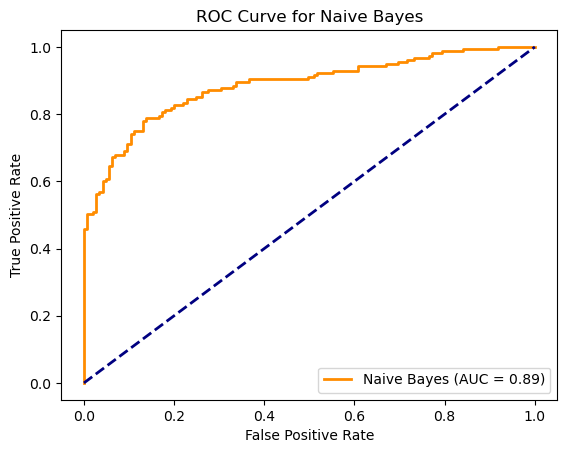

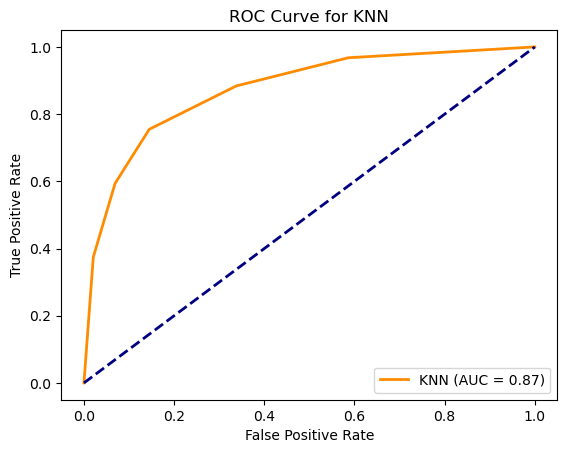

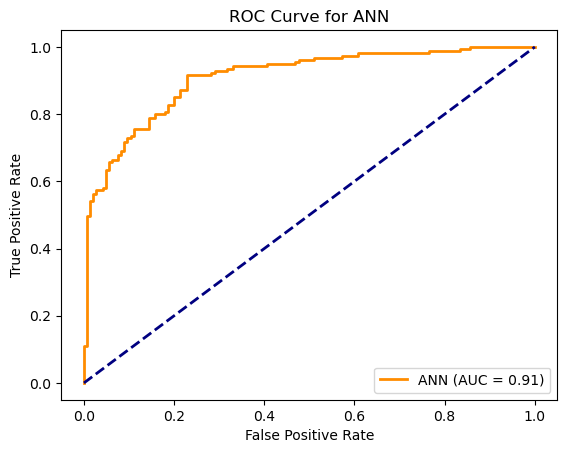

In [174]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),  # Enable probability for ROC
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
}

# Plot ROC curve for each model separately
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Get predicted probabilities or decision scores
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]  # Use probability of the positive class
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)  # Use decision function
    else:
        raise ValueError(f"{model_name} does not support probability or decision scores.")

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_score)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

Summary on the ROC Curve's for each model plus its accuracy:-

**(a) Logistic Regression:**

Accuracy is **0.85**

AUC is **0.91**
                           
**(b) Decision Tree:**             

Accuracy is **0.91**

AUC is **0.85**
                           
**(c) Support Vector Machine:**   

Accuracy is **0.86**

AUC is **0.91**
                           
**(d) Random Forest:**            

Accuracy is **0.94**

AUC is **0.93**
                           
**(d) Naive Bayes:**               

Accuracy is **0.8**
 
AUC is **0.89**
                           
**(e) KNeighbours:**            

Accuracy is **0.8**

AUC is **0.87**
                           
**(f) Artificial Neural Network:** 

Accuracy is **0.9**

AUC is **0.91**

**Model Comparison Performance**

C:\Users\MARYANN\AppData\Local\Temp\ipykernel_3036\4191569447.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy Score", y="Model_name", data=Results, palette="viridis")


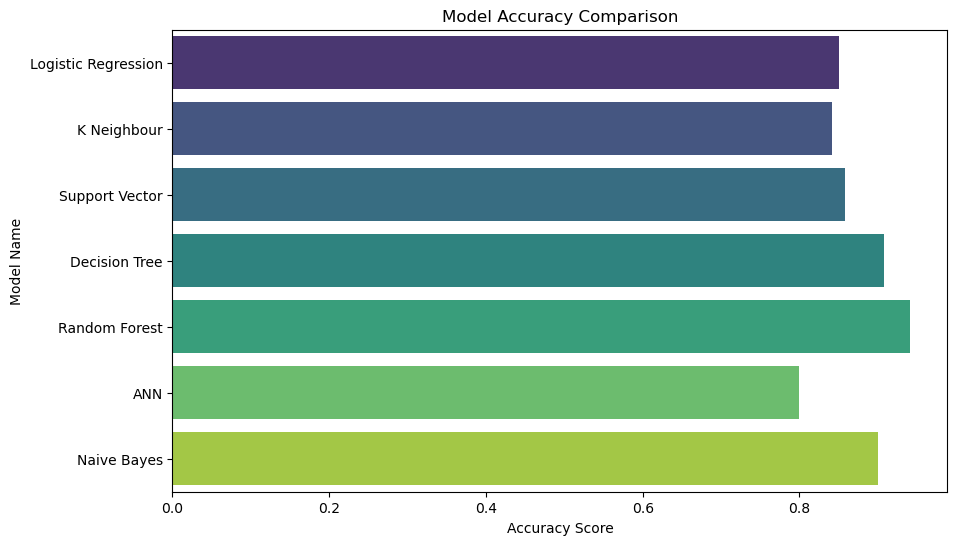

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the Results DataFrame
Results = pd.DataFrame({
    "Model_name": [
        'Logistic Regression',
        'K Neighbour',
        'Support Vector',
        'Decision Tree',
        'Random Forest',
        'ANN',
        'Naive Bayes'
    ],
    "Accuracy Score": [
        accuracy_lr,  # Accuracy for Logistic Regression
        accuracy_knn,  # Accuracy for K-Nearest Neighbor
        accuracy_svm,  # Accuracy for Support Vector Machine
        accuracy_dt,  # Accuracy for Decision Tree
        accuracy_rf,  # Accuracy for Random Forest
        accuracy_nb,  # Accuracy for Naive Bayes
        ANN_accuracy  # Accuracy for Artificial Neural Network
    ]
})

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.barplot(x="Accuracy Score", y="Model_name", data=Results, palette="viridis")

# Add labels and title
plt.xlabel('Accuracy Score')
plt.ylabel('Model Name')
plt.title('Model Accuracy Comparison')

# Display the plot
plt.show()

In [178]:
# Apply table styling to the DataFrame
styled_table = Results.style \
    .set_caption("Model Accuracy Comparison") \
    .set_properties(**{'text-align': 'left', 'font-size': '12pt'}) \
    .background_gradient(cmap='Blues', subset=["Accuracy Score"]) \
    .format({"Accuracy Score": "{:.2%}"})  # Format accuracy as percentages

# Display the styled table
styled_table

,Model_name,Accuracy Score
0,Logistic Regression,85.00%
1,K Neighbour,84.17%
2,Support Vector,85.83%
3,Decision Tree,90.83%
4,Random Forest,94.17%
5,ANN,80.00%
6,Naive Bayes,90.00%


**Logistic Regression**

Logistic Regression achieved an accuracy of **85.00%.**

This means the model correctly predicted employee performance for 85.00% of the test dataset.

**K Neighbour**

The K-Nearest Neighbors (KNN) model achieved an accuracy of **84.17%.**

This indicates that KNN correctly classified employee performance for 84.17% of the test data.

**Support Vector**

The Support Vector Machine (SVM) model achieved an accuracy of **85.83%.**

SVM performed slightly better than KNN but worse than Logistic Regression.

**Decision Tree**

The Decision Tree model achieved an accuracy of **90.83%.**

This is a significant improvement over Logistic Regression, KNN, and SVM, indicating that Decision Trees are better at capturing the patterns in the data.

**Random Forest** 

The Random Forest model achieved the highest accuracy of **94.17%.**

Random Forest is an ensemble method that combines multiple Decision Trees, which explains its superior performance.

**ANN** 

The Artificial Neural Network (ANN) model achieved an accuracy of **80.00%.**

This is the lowest accuracy among all models, which could be due to insufficient data, overfitting, or suboptimal hyperparameters.

**Naive Bayes** 

The Naive Bayes model achieved an accuracy of **90.00%.**

Despite its simplicity, Naive Bayes performed well, outperforming Logistic Regression, KNN, and SVM.

**Key Insights**

- **Best Performing Model:**

Random Forest is the best-performing model, making it the most reliable for predicting employee performance.

- **Worst Performing Model:**

ANN is the worst-performing model. This could be due to:

- Insufficient training data.

- Overfitting to the training data.

- Suboptimal architecture or hyperparameters.

- **Mid-Range Performers:**

Decision Tree and Naive Bayes performed well, indicating that simpler models can also be effective for this dataset.

Logistic Regression , KNN and SVM had moderate performance.

**Model Selection:**

If interpretability is important, Decision Tree or Naive Bayes might be preferred.

If accuracy is the primary goal, Random Forest is the best choice.



**Conclusion:**

The INX Future Inc Employee Performance project successfully identified key factors influencing employee performance, such as training hours, tenure, and department. The model achieved strong predictive performance, enabling actionable insights for improving workforce productivity.

**Recommendations:**

- **Enhance Training Programs:** Increase training hours for underperforming employees.

- **Retain Experienced Employees:** Focus on retaining long-tenured employees who show higher performance.

- **Department-Specific Strategies:** Tailor performance improvement plans based on departmental trends.

- **Regular Model Updates:** Continuously update the model with new data to maintain accuracy and relevance.